# physics-based model 2021.8.28

## A generic tool wear model and its application to force modeling and wear monitoring in high speed milling 2021.8.23

### tool wear curve fitting

[-2.39989356e+02 -3.13945710e-03 -3.34371263e+01  2.41109006e-02]


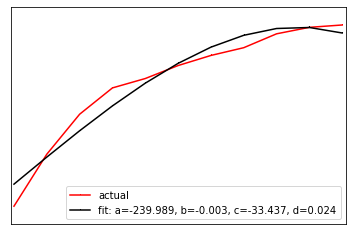

[ 4.16930329e-02  3.25779242e+01 -5.26609534e+00  1.75803323e-02]


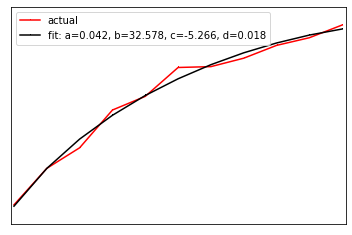

[ 4.19731223e+01  1.17592951e-02 -2.96969313e+00  1.93006806e-02]


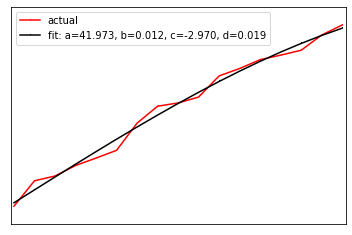

[ 2.56320038e+01  2.22367168e-02 -8.11752349e+00  1.85664135e-02]


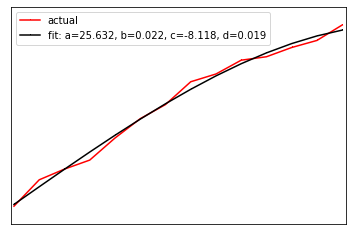

[ 4.23425420e-02  2.33412935e+01 -1.31748208e+00  1.62810162e-02]


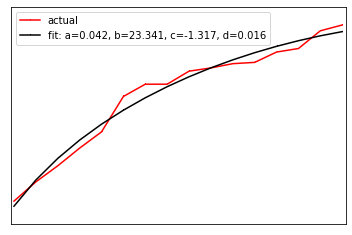

[-1.23161123e+02 -7.88137666e-03 -4.14696943e+01  1.83832260e-02]


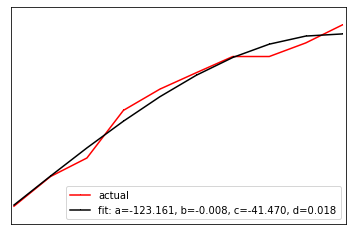

[ 2.43156633e+01  1.63176468e-02 -1.27955662e+00  1.92667113e-02]


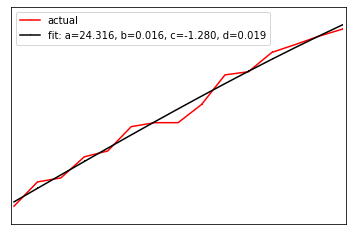

[-1.08295546e+02 -6.96642643e-03 -1.95760900e+01  1.89673480e-02]


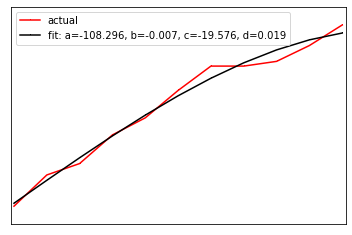

physics_guided_parameter (8, 4)
complete


In [1]:
# 两齿磨损被平均

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import random
import xlrd
import xlwt
import time
import os

INTERPOLATION_NUM = 120
LABEL_LOADPATH = ['tool_wear_2/k1-1/flank_wear1.xls', 'tool_wear_2/k2/flank_wear1.xls', 'tool_wear_2/k3/flank_wear1.xls', 
                  'tool_wear_2/k4/flank_wear1.xls', 'tool_wear_2/k5/flank_wear1.xls','tool_wear_2/k6/flank_wear1.xls', 
                  'tool_wear_2/k7/flank_wear1.xls', 'tool_wear_2/k8/flank_wear1.xls']
PARAMETER_SAVEPATH = 'generic_data/guided_parameter.npy' #物理模型系数存储路径

def physics_based_func(t, a, b, c, d):
    return a*np.log(b*t+1) + c*pow(t, 3) + d

def wear_curve_fitting(label_loadpath):
    physics_guided_parameter = []
#     plt.figure(figsize=(20, 10))
    for i in range(len(label_loadpath)):
        #读取label
        workbook = xlrd.open_workbook(label_loadpath[i])
        sheet1 = workbook.sheet_by_index(0)         #用索引取第一个sheet
        label = np.array([sheet1.col_values(0), sheet1.col_values(1)])
        label = np.transpose(label.astype(np.float32))
        label = np.mean(label, axis=1)
        label = np.concatenate([[0.018], label])#插入假定初始值0.018
        x = np.arange(0, np.shape(label)[0]) *0.01 #注意这里为避免舍入误差*0.01
        # Fit for the parameters a, b, c of the function func:
        popt, _ = curve_fit(physics_based_func, x, label, maxfev=50000)#, bounds=(0, [100., 100., 1, 50])
        print(popt)
        physics_guided_parameter.append(popt)
        
#         plt.subplot(3, 1, i+1)
        plt.plot(x, label, color='red', marker = ',', label='actual')
        plt.plot(x, physics_based_func(x, *popt), color='black', marker = ',', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%2.3f' % tuple(popt))
        plt.legend()
        plt.xticks([])  #去掉横坐标值
        plt.yticks([])  #去掉纵坐标值
        plt.margins(0.01,0.1)
        plt.show()
    
    print('physics_guided_parameter', np.shape(physics_guided_parameter))
    np.save(PARAMETER_SAVEPATH, physics_guided_parameter)
#     plt.savefig('physics_based_predict.png', dpi = 500)

wear_curve_fitting(LABEL_LOADPATH)
print('complete')


### 数据集生成，基于experiment 1 physics-based

generic_data/k1-1_wear.npy#######################################################


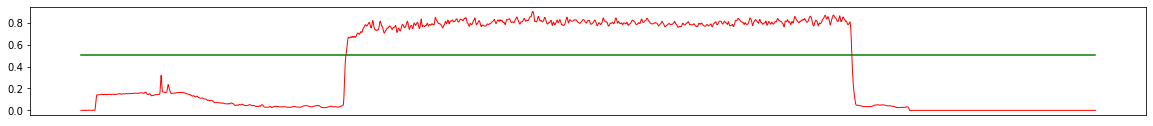

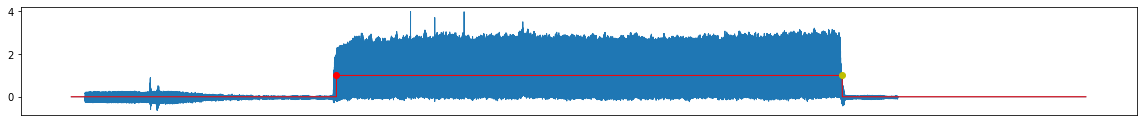

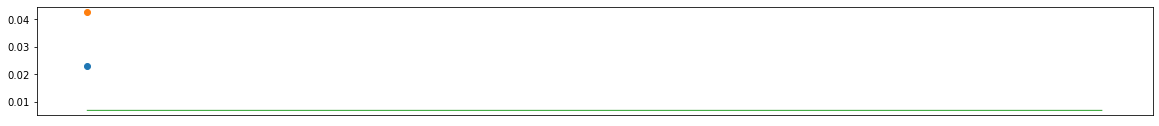

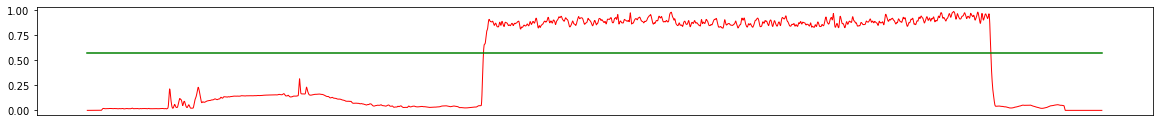

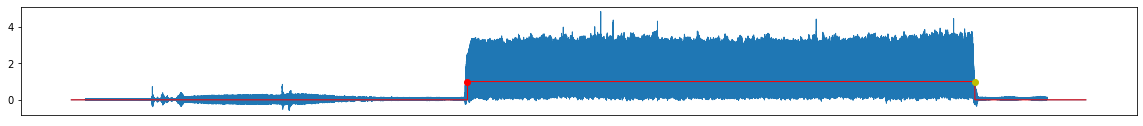

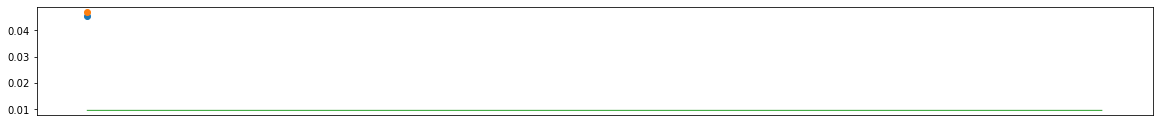

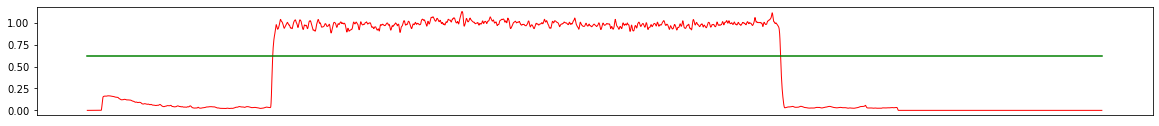

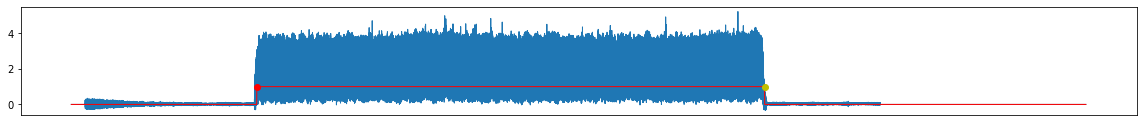

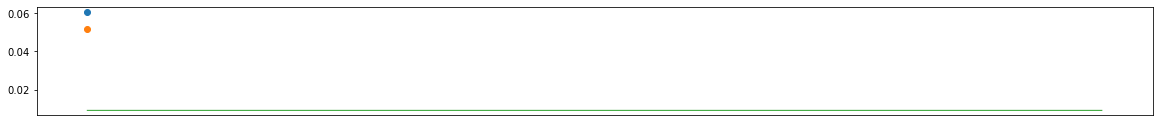

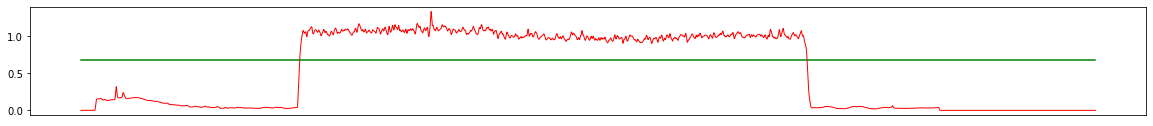

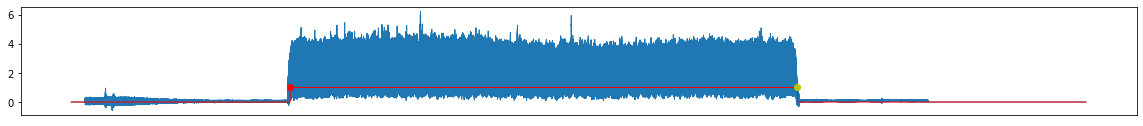

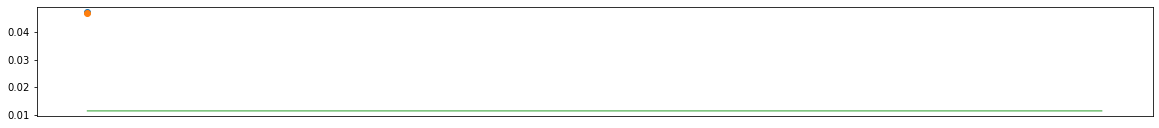

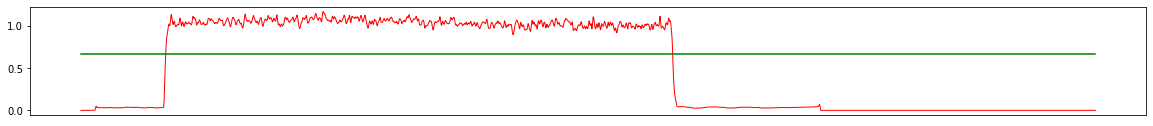

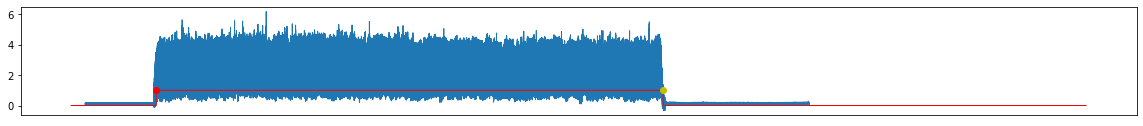

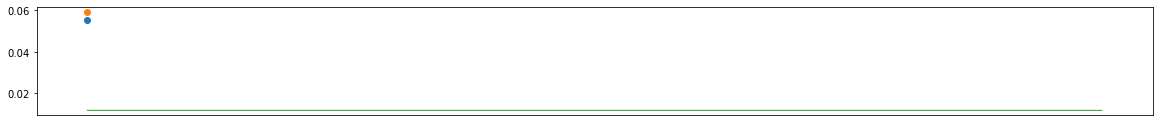

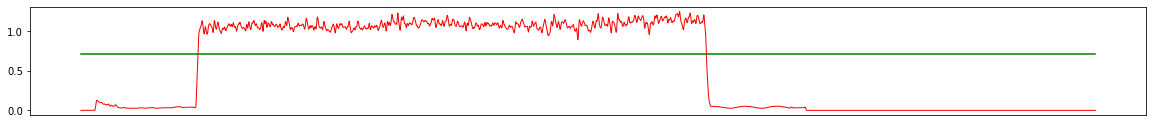

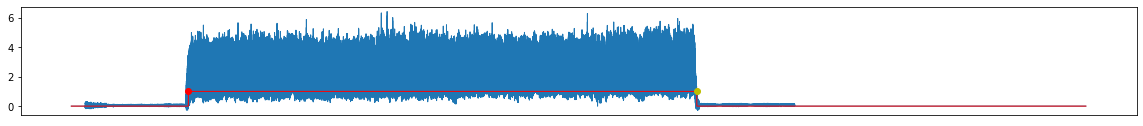

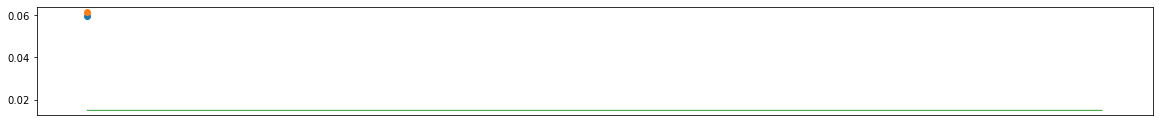

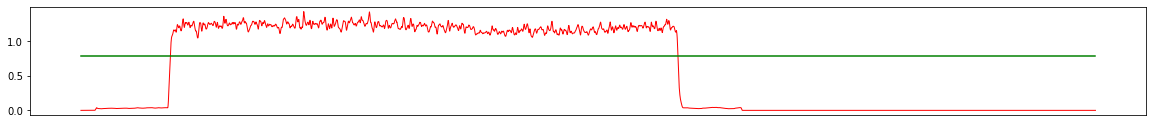

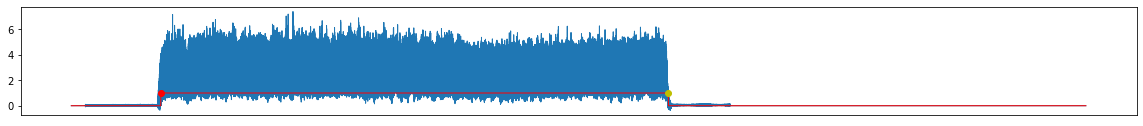

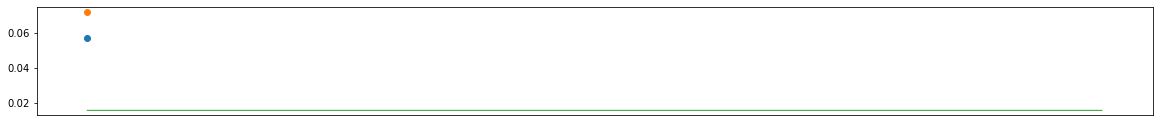

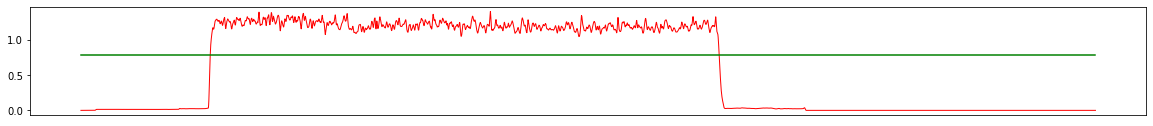

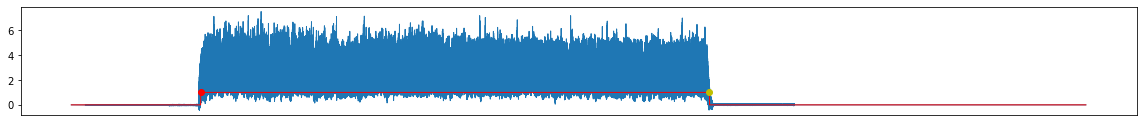

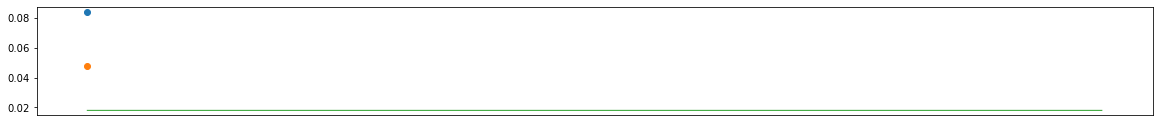

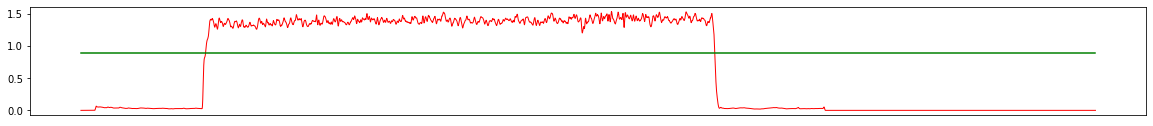

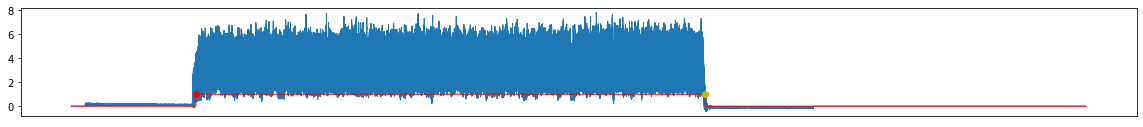

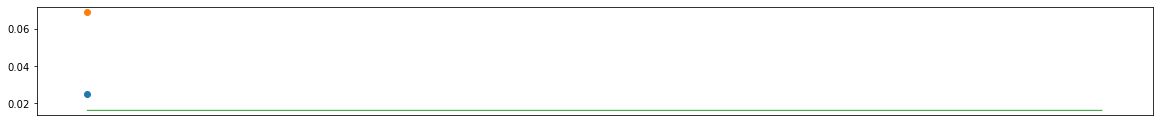

delete_index [   0    1  118  119  120  121  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  478  479  480  481  598  599  600  601  718  719
  720  721  838  839  840  841  958  959  960  961 1078 1079 1080 1081
 1198 1199]
data_valid (1044, 1728, 3)
label (1044, 7)
generic_data/k2_wear.npy#######################################################


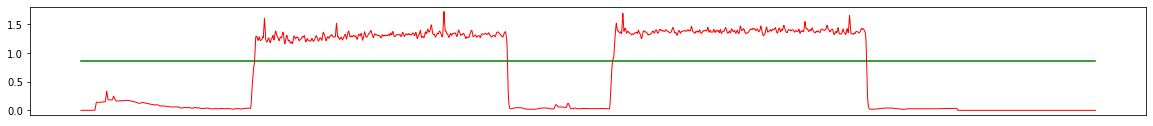

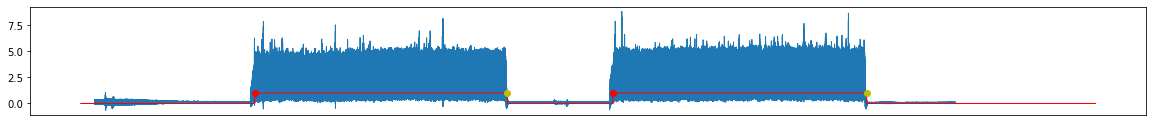

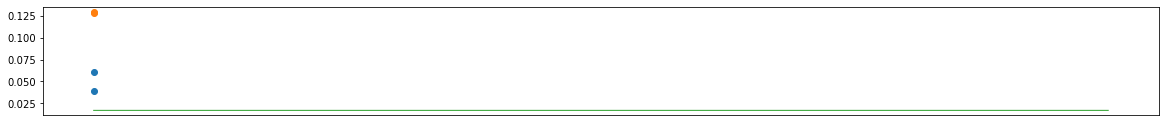

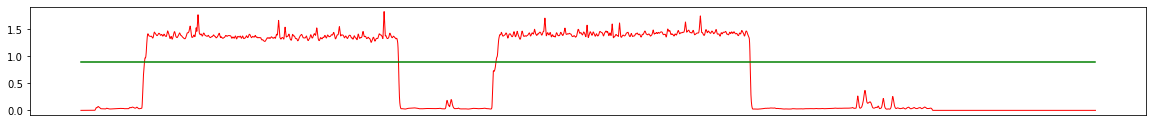

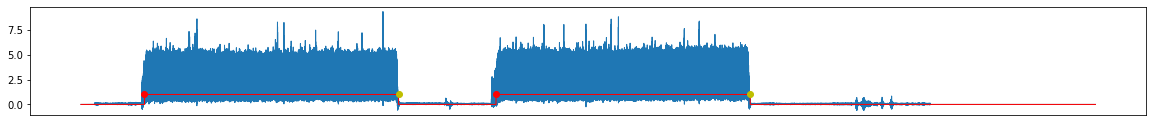

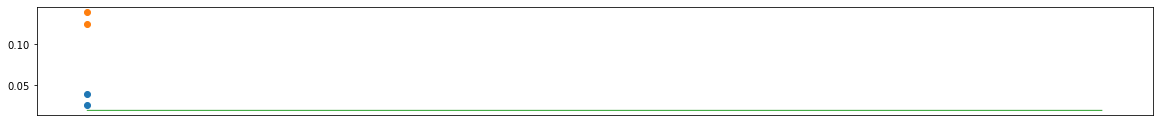

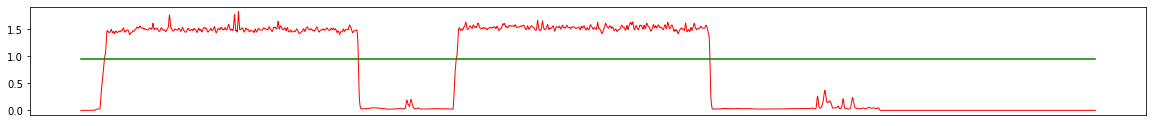

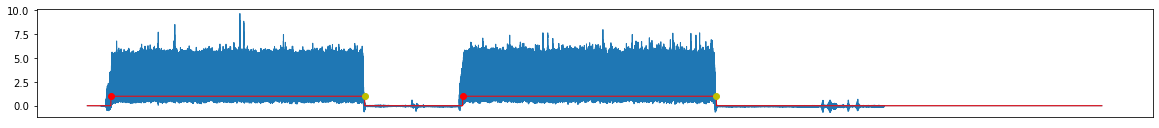

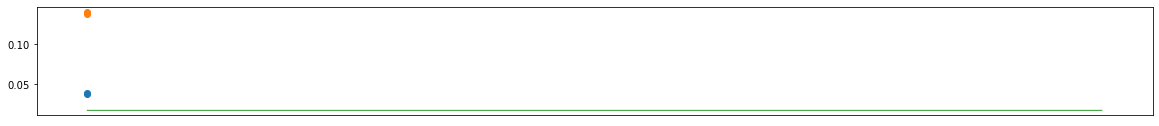

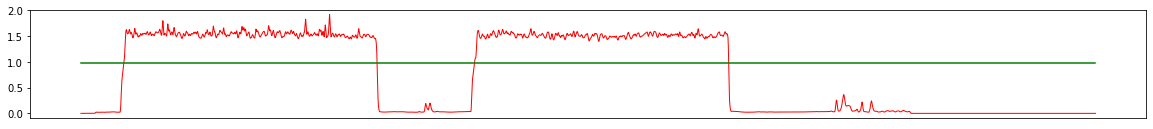

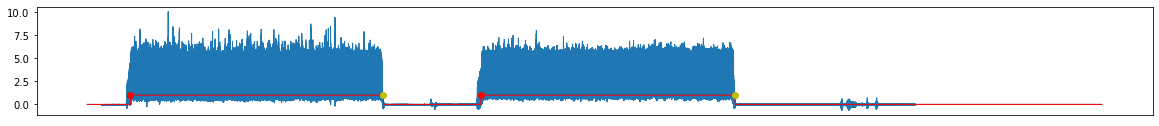

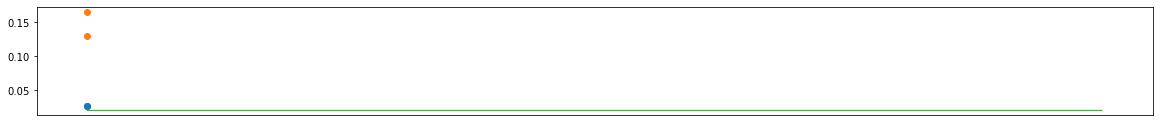

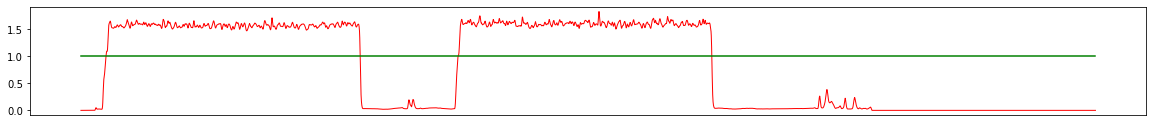

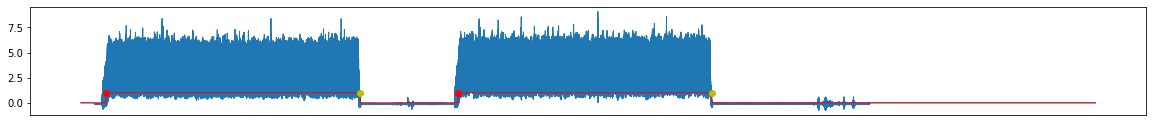

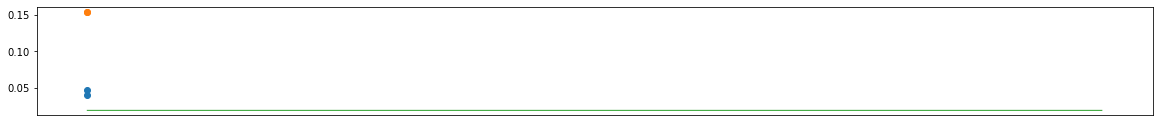

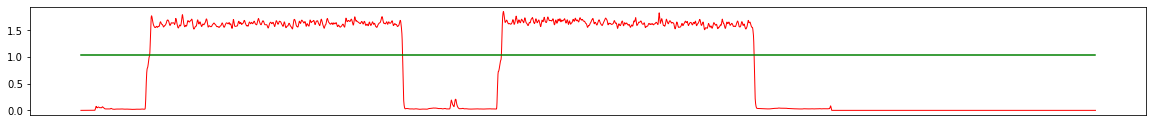

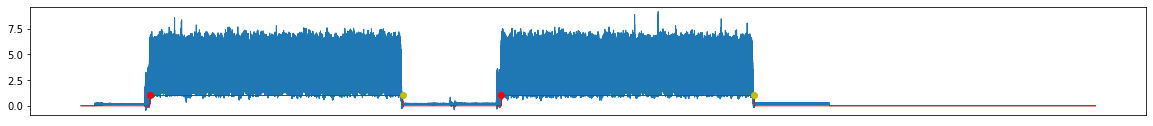

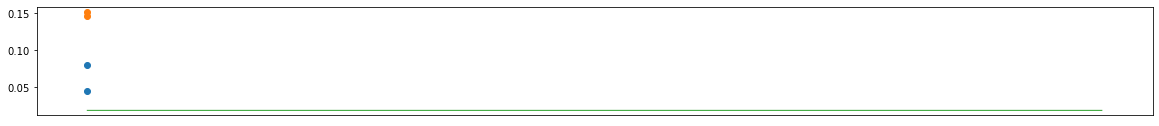

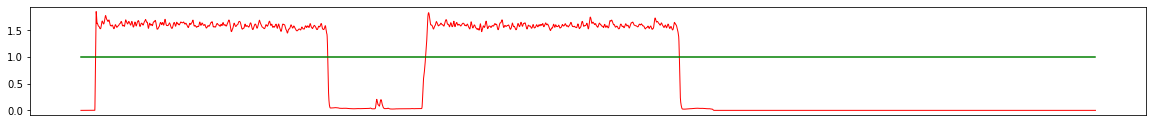

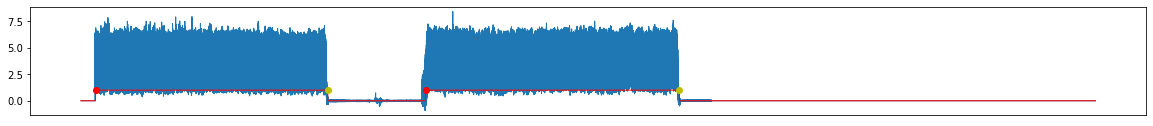

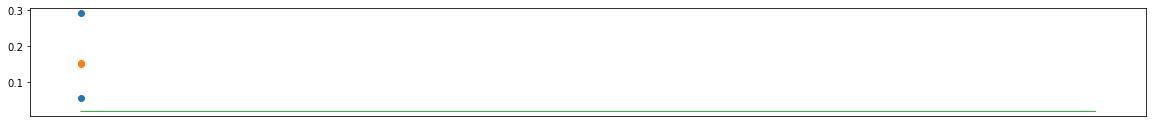

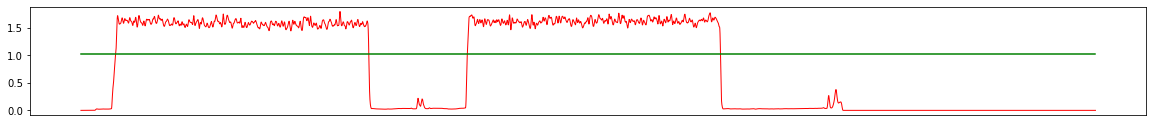

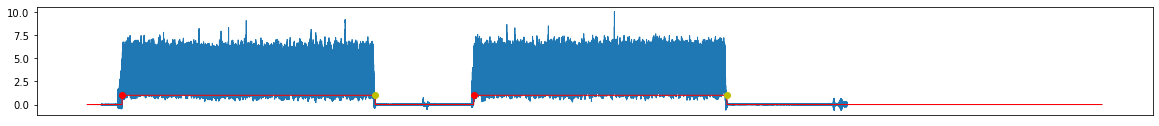

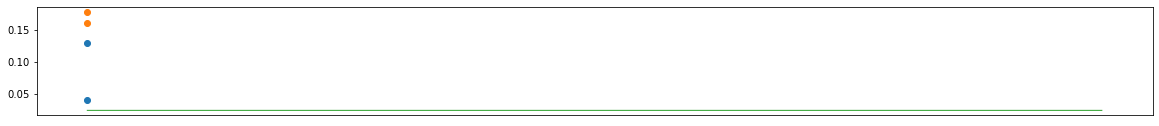

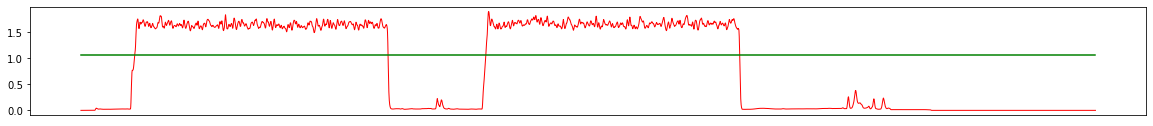

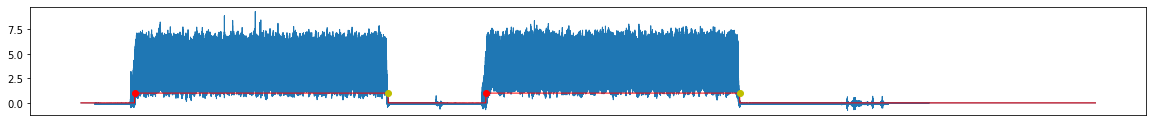

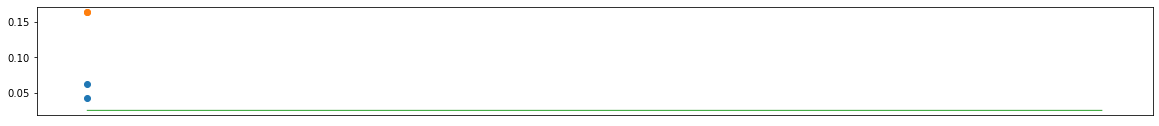

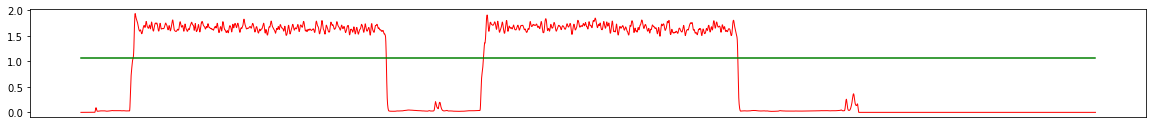

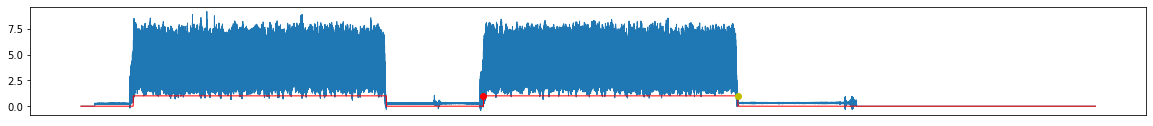

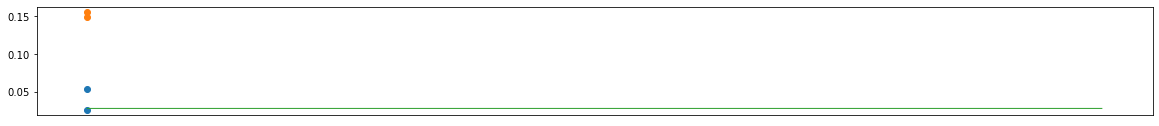

delete_index [   0    1   58   59   60   61  118  119  120  121  178  179  180  181
  238  239  240  241  298  299  300  301  358  359  360  361  418  419
  420  421  478  479  480  481  538  539  540  541  598  599  600  601
  658  659  660  661  718  719  720  721  778  779  780  781  838  839
  840  841  898  899  900  901  958  959  960  961 1018 1019 1020 1021
 1078 1079 1080 1081 1198 1199]
data_valid (1124, 1728, 3)
label (1124, 7)
generic_data/k3_wear.npy#######################################################


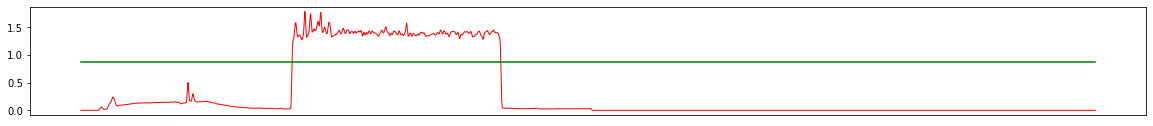

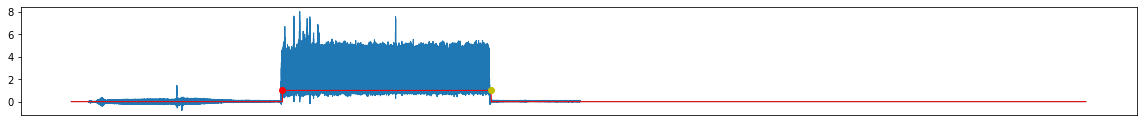

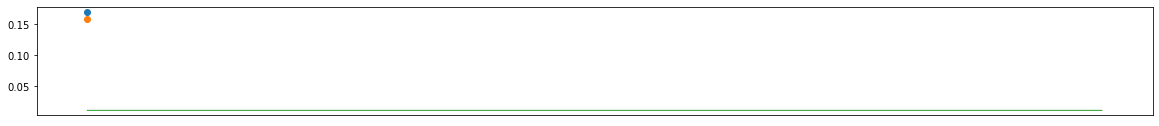

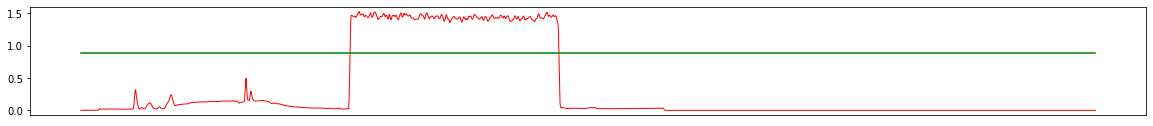

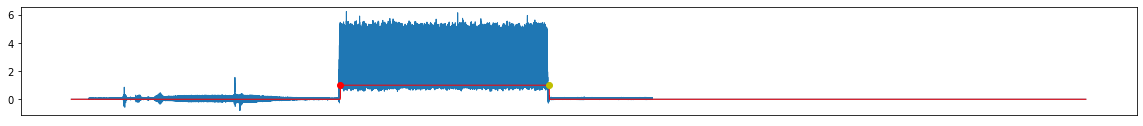

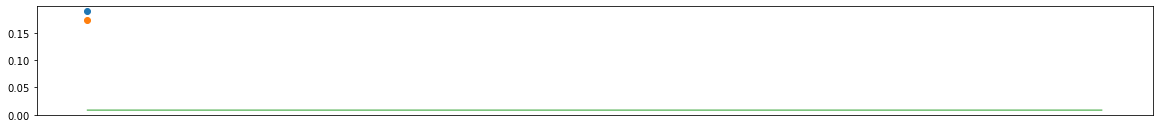

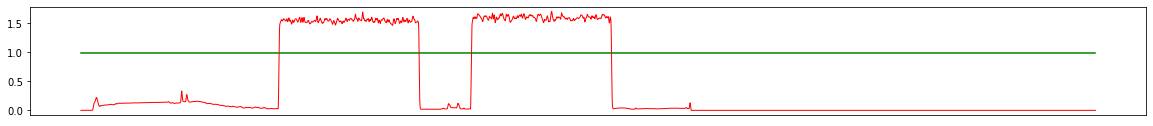

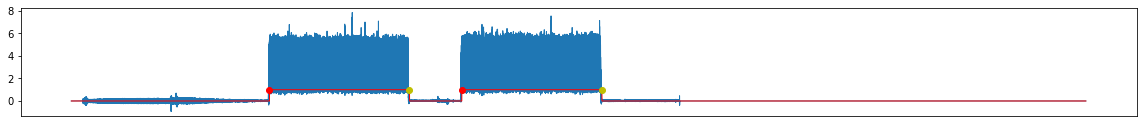

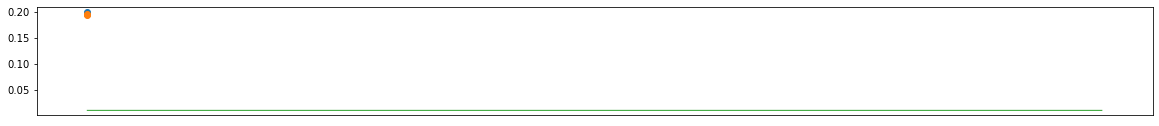

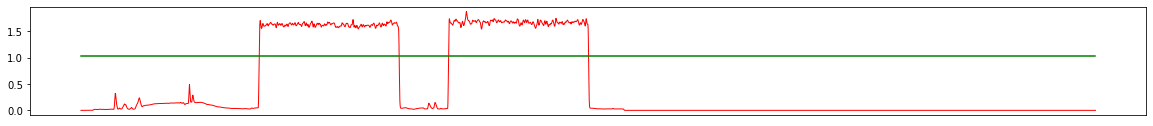

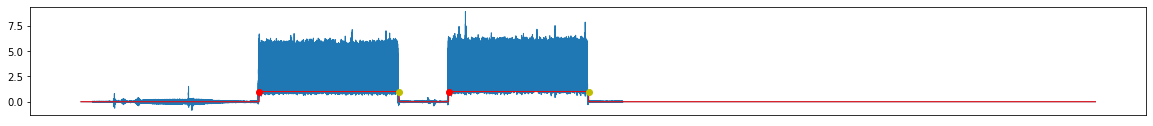

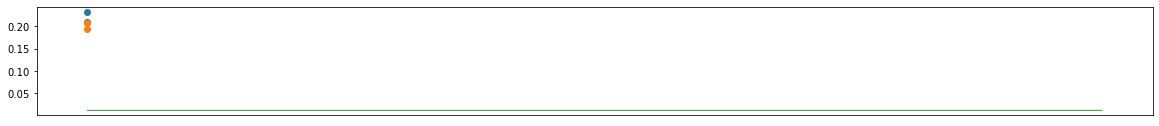

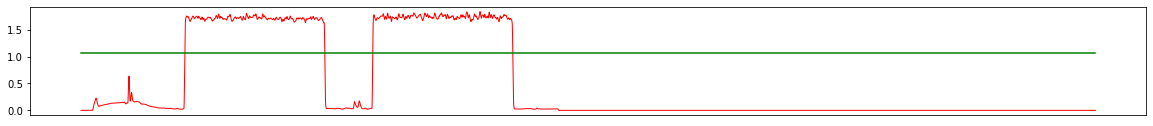

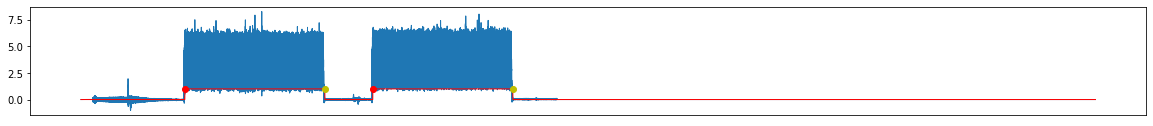

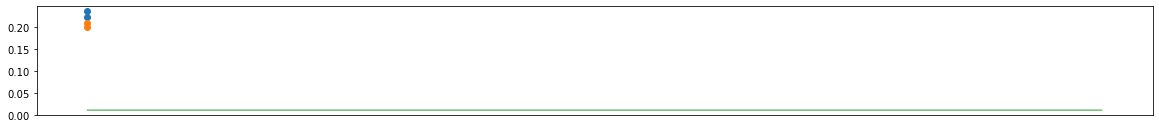

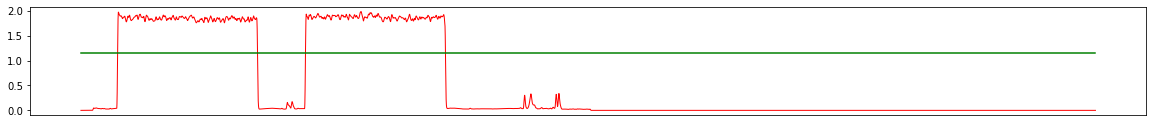

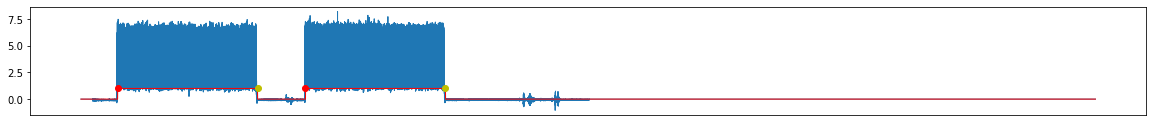

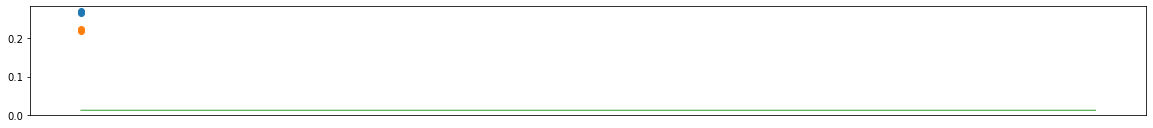

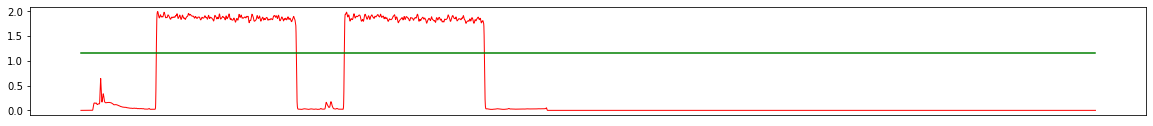

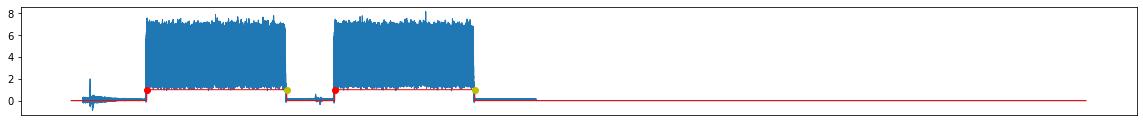

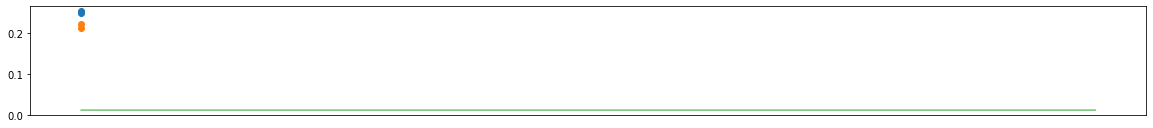

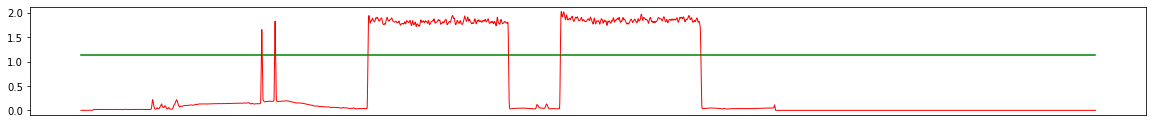

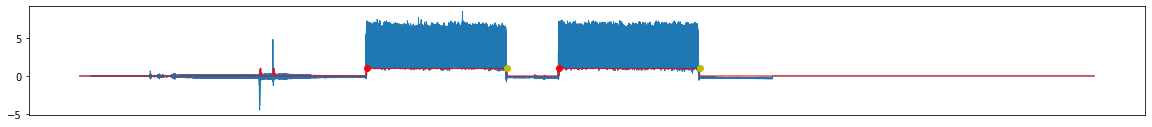

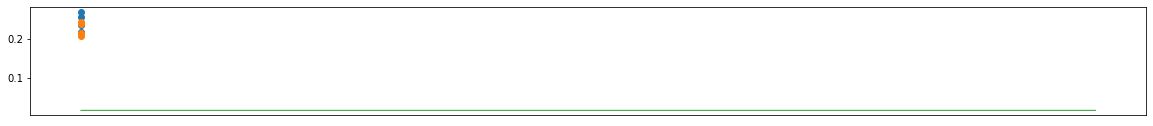

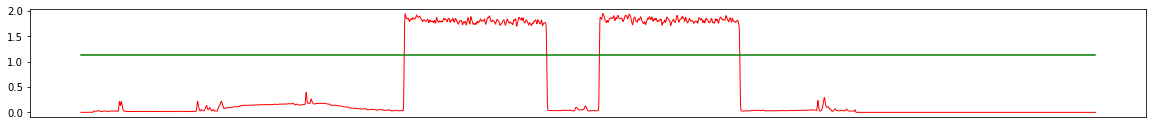

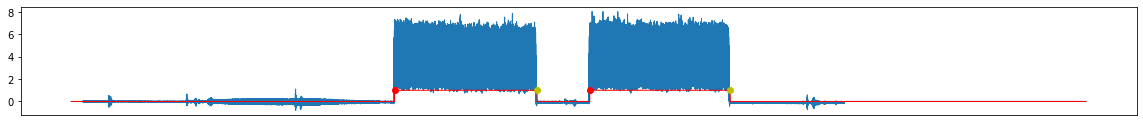

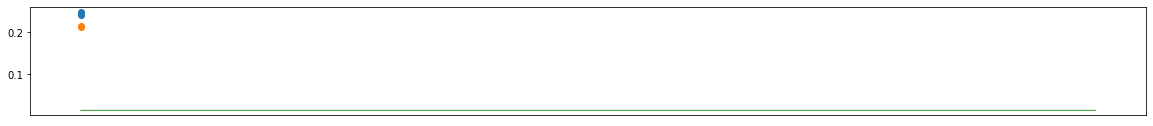

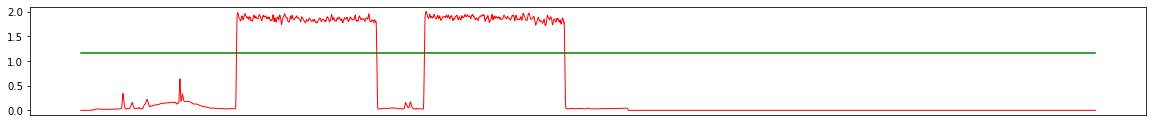

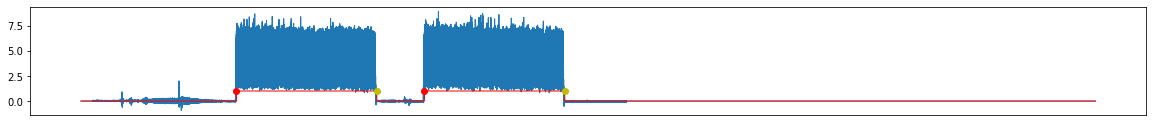

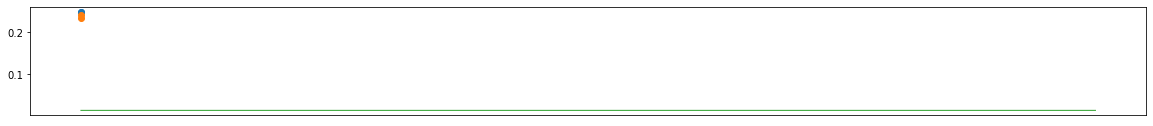

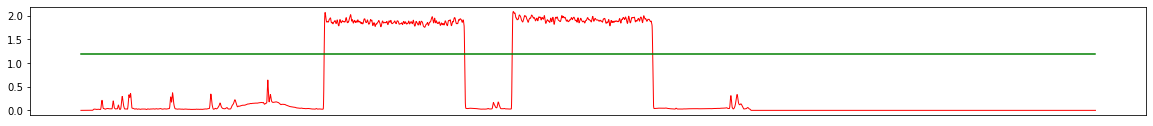

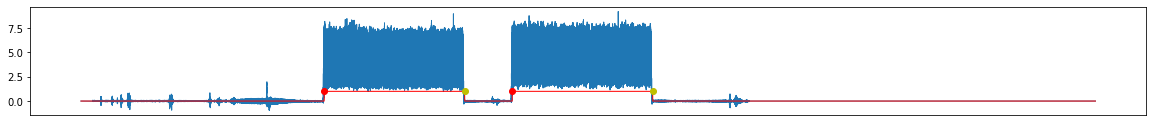

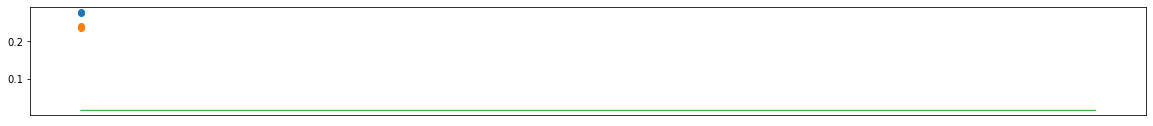

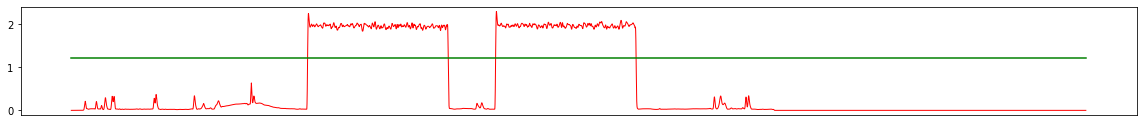

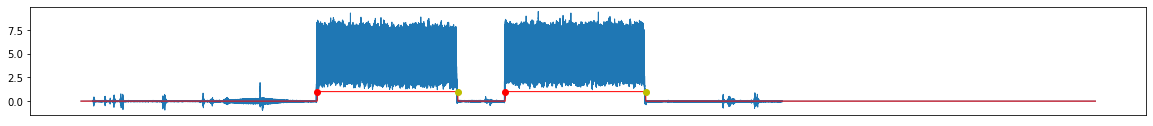

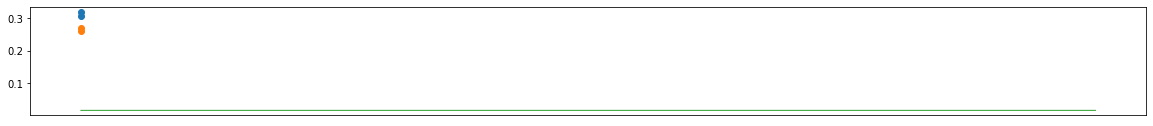

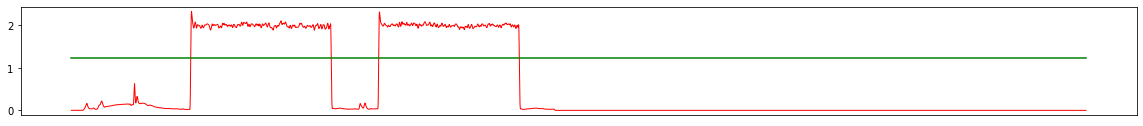

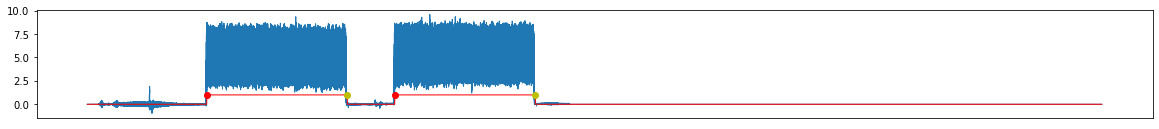

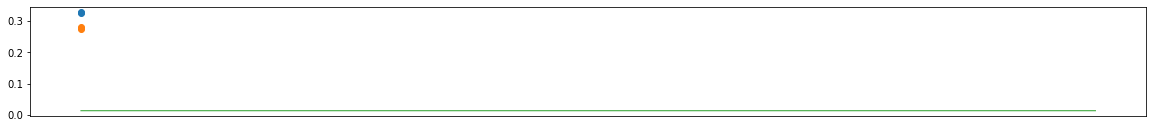

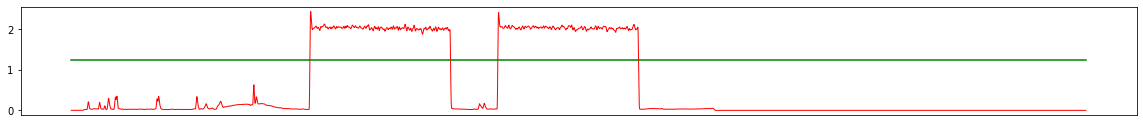

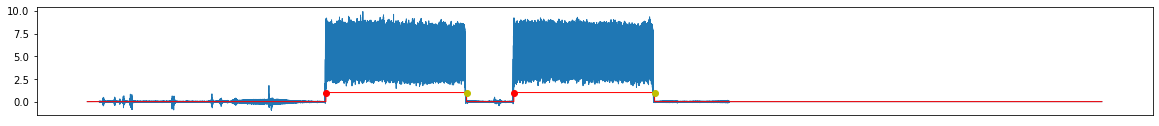

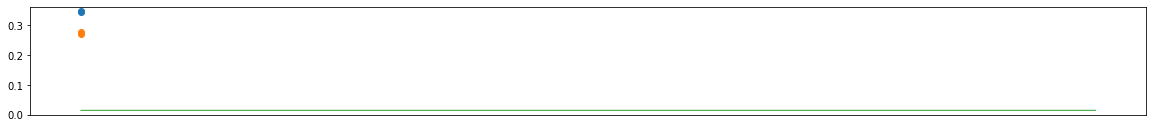

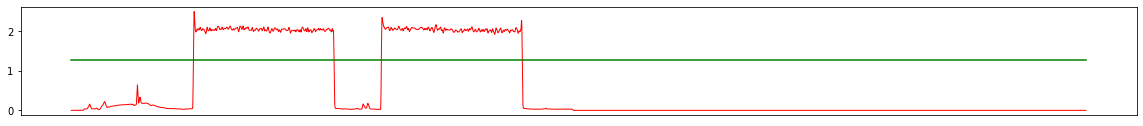

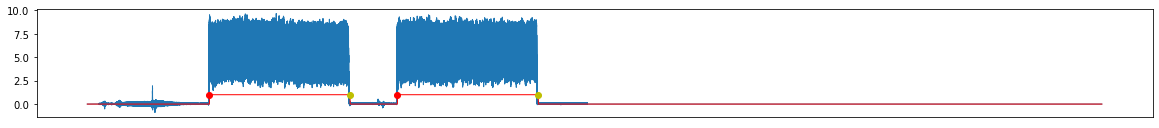

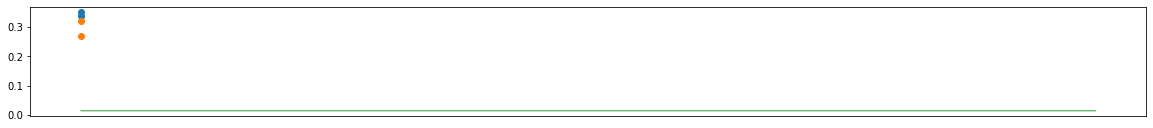

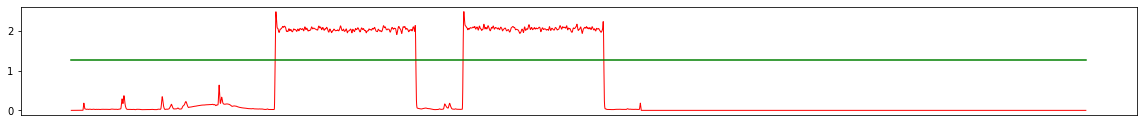

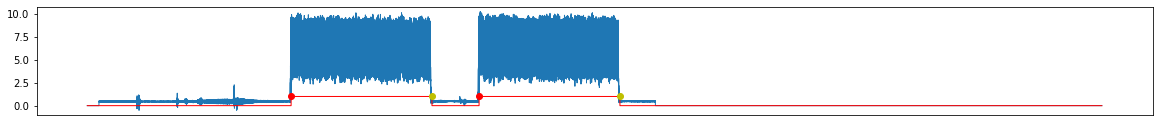

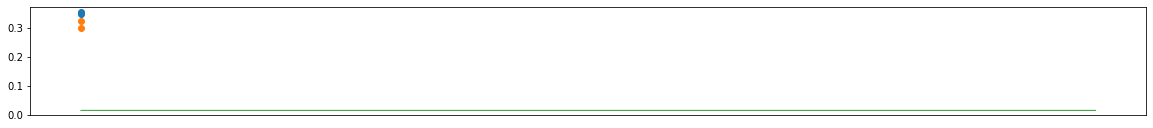

delete_index [   0    1  118  119  120  121  238  239  240  241  298  299  300  301
  358  359  360  361  418  419  420  421  478  479  480  481  538  539
  540  541  598  599  600  601  658  659  660  661  718  719  720  721
  778  779  780  781  838  839  840  841  898  899  900  901  958  959
  960  961 1018 1019 1020 1021 1078 1079 1080 1081 1138 1139 1140 1141
 1198 1199 1200 1201 1258 1259 1260 1261 1318 1319 1320 1321 1378 1379
 1380 1381 1438 1439 1440 1441 1498 1499 1500 1501 1558 1559 1560 1561
 1618 1619 1620 1621 1678 1679 1680 1681 1738 1739 1740 1741 1798 1799
 1800 1801 1858 1859 1860 1861 1918 1919]
data_valid (1800, 1728, 3)
label (1800, 7)
generic_data/k4_wear.npy#######################################################


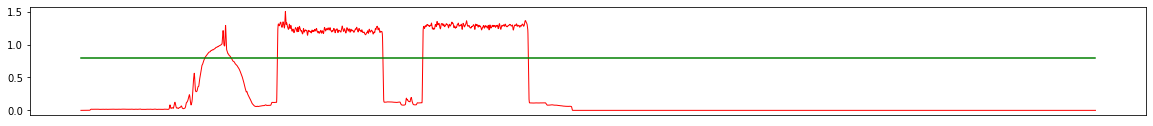

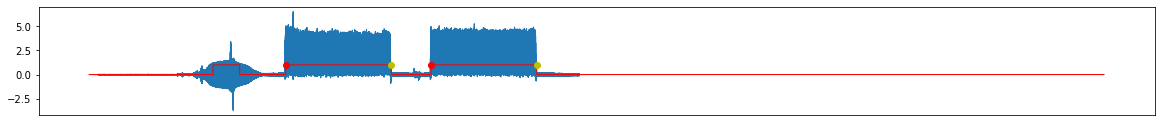

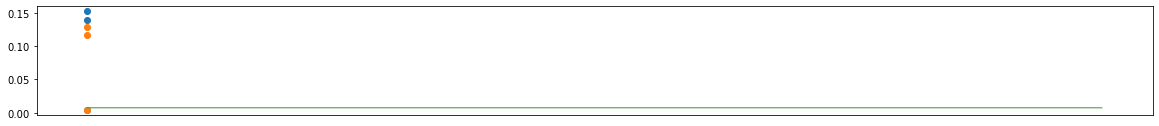

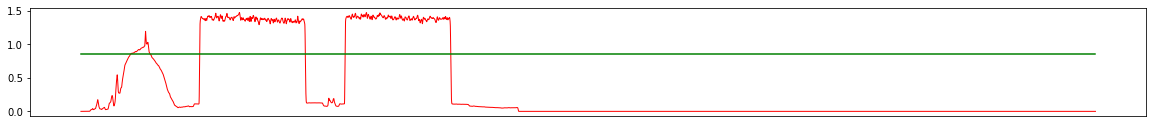

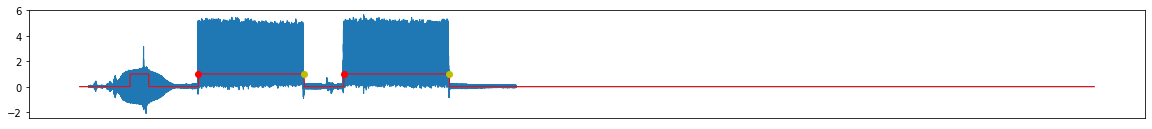

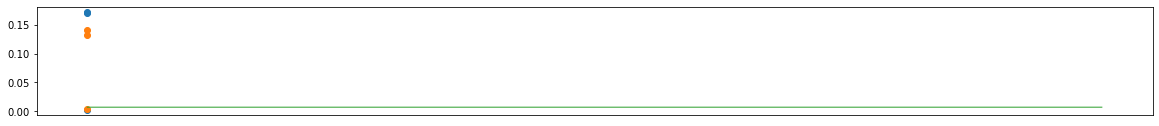

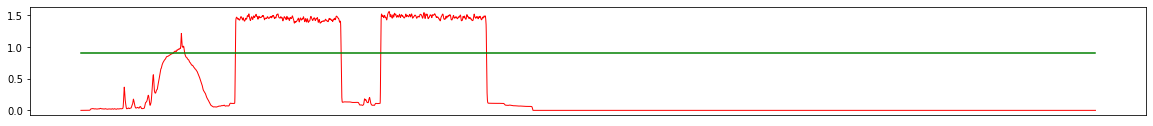

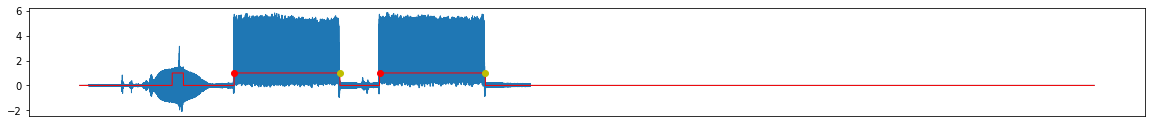

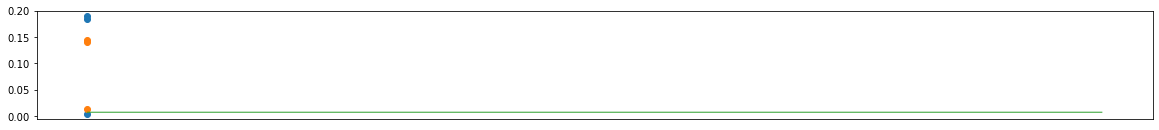

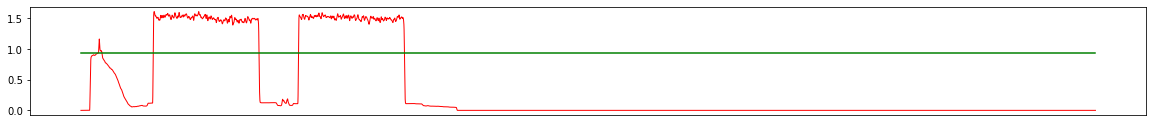

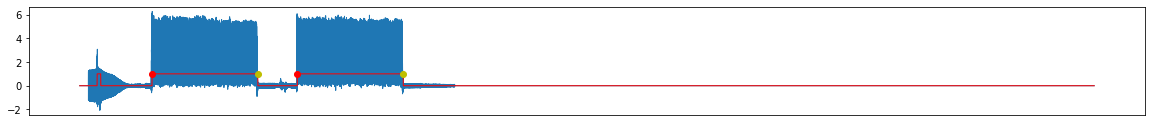

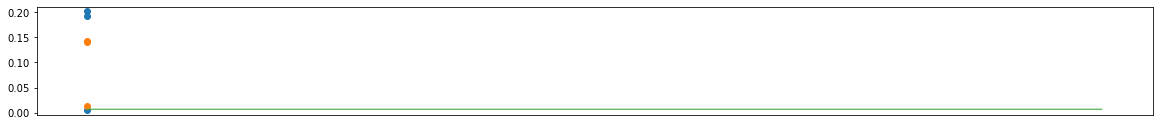

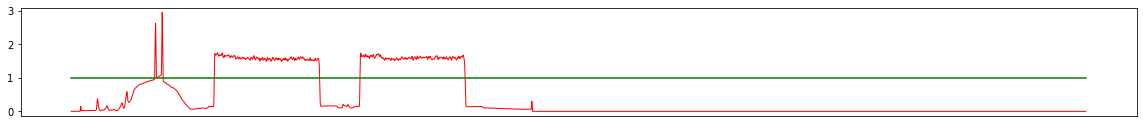

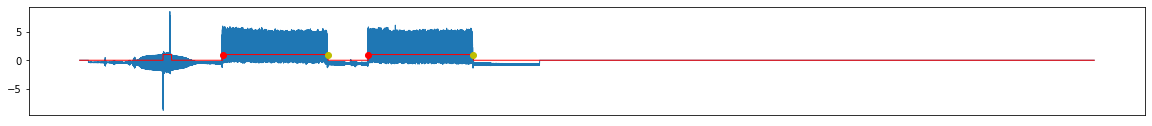

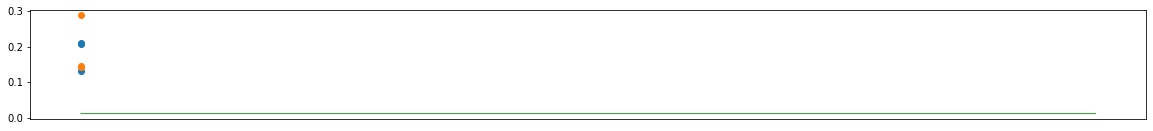

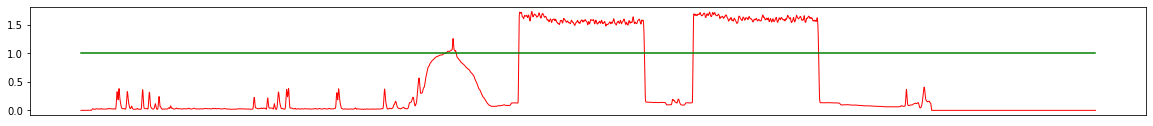

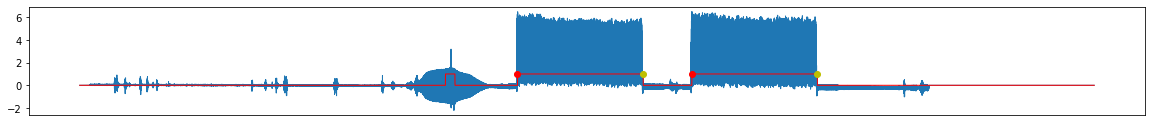

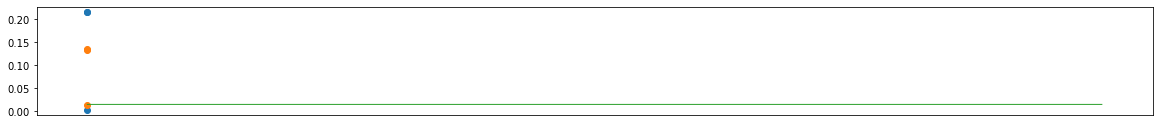

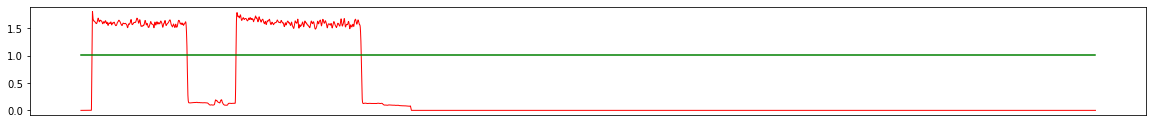

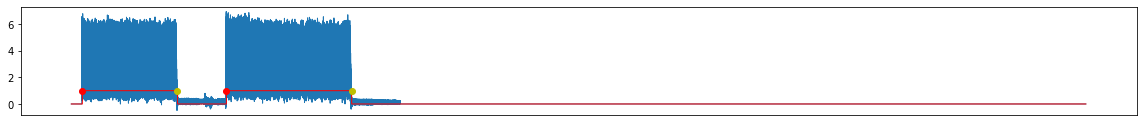

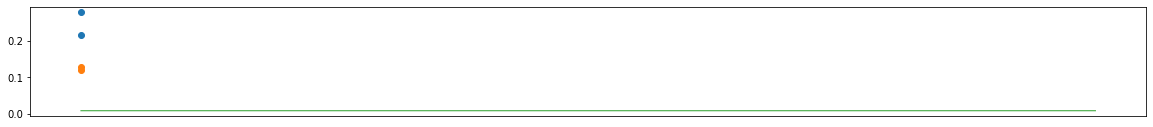

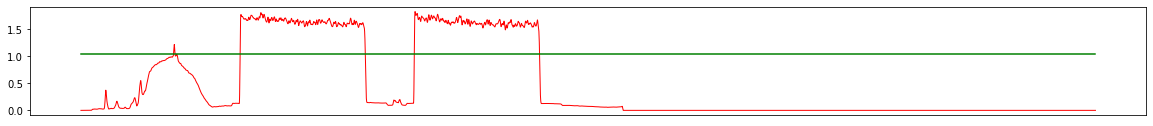

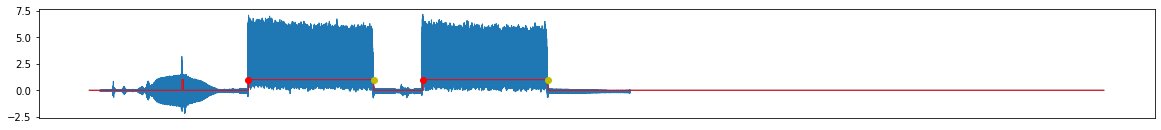

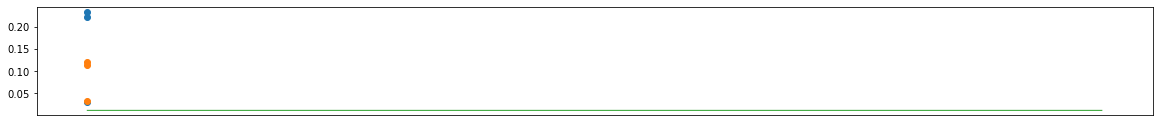

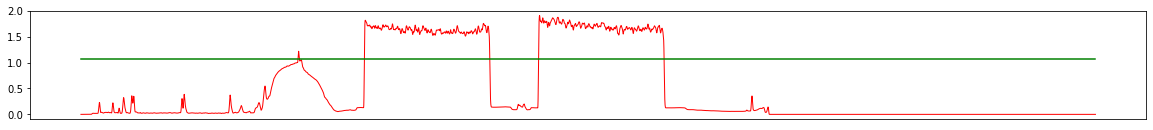

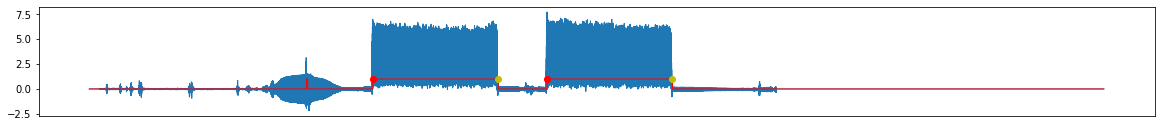

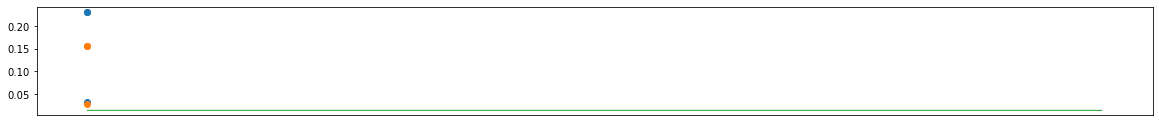

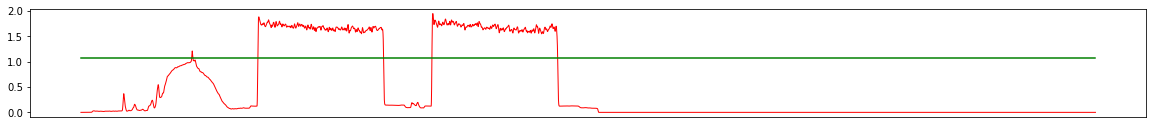

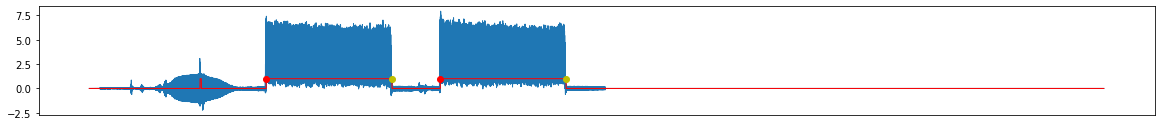

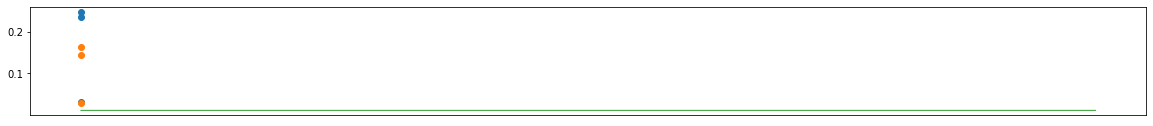

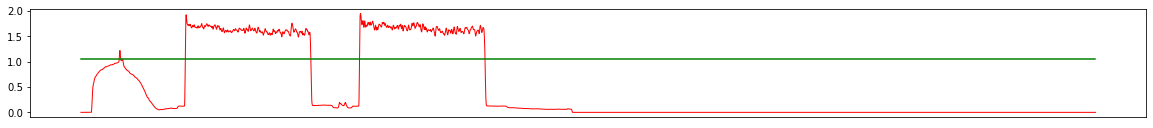

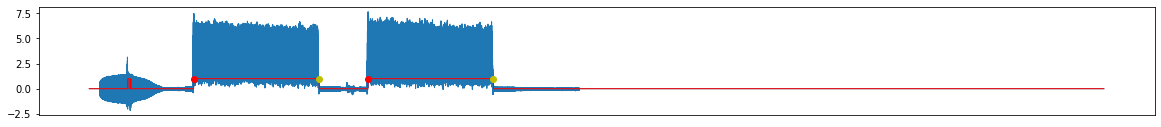

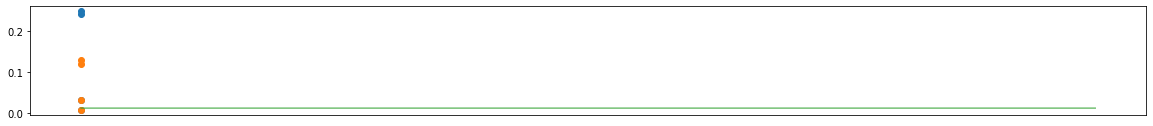

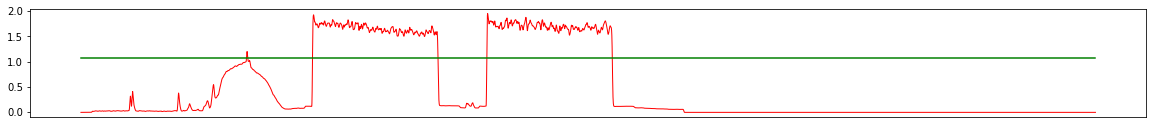

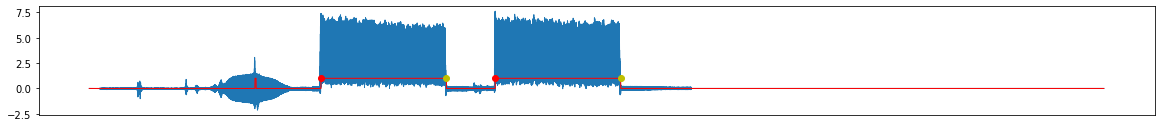

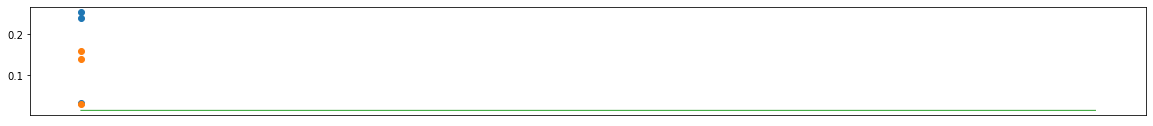

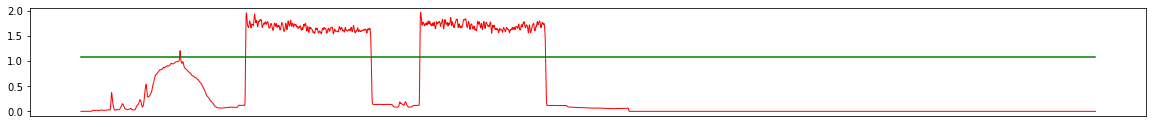

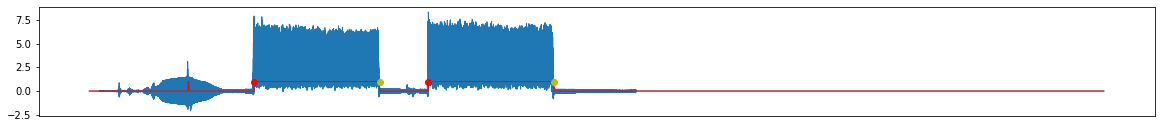

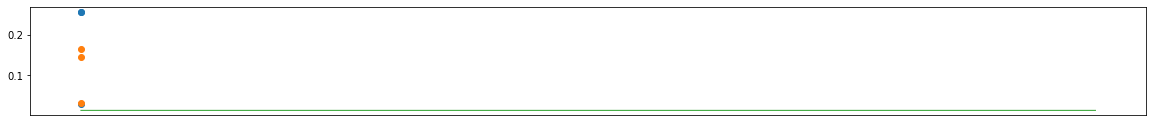

delete_index [   0    1   58   59   60   61  118  119  120  121  178  179  180  181
  238  239  240  241  298  299  300  301  358  359  360  361  418  419
  420  421  478  479  480  481  538  539  540  541  598  599  600  601
  658  659  660  661  718  719  720  721  778  779  780  781  838  839
  840  841  898  899  900  901  958  959  960  961 1018 1019 1020 1021
 1078 1079 1080 1081 1138 1139 1140 1141 1198 1199 1200 1201 1258 1259
 1260 1261 1318 1319 1320 1321 1378 1379 1380 1381 1438 1439 1440 1441
 1498 1499 1500 1501 1558 1559]
data_valid (1456, 1728, 3)
label (1456, 7)
generic_data/k6_wear.npy#######################################################


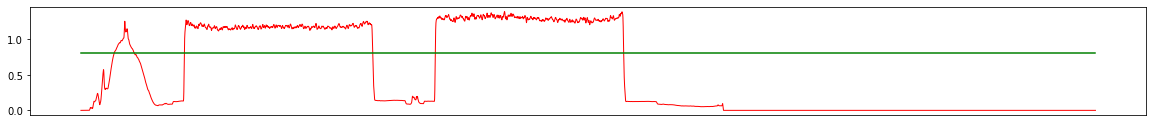

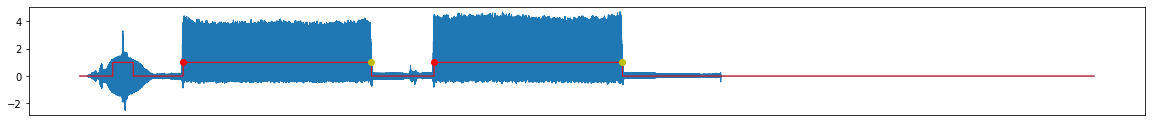

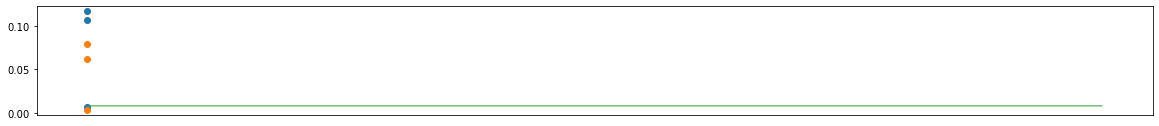

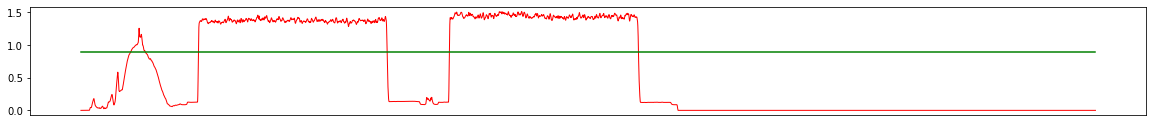

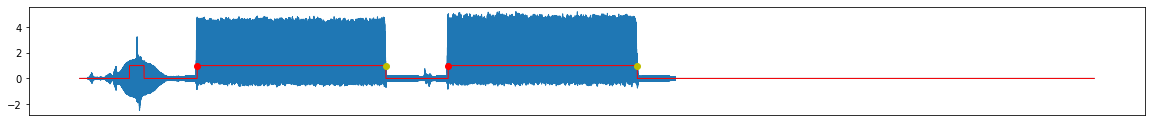

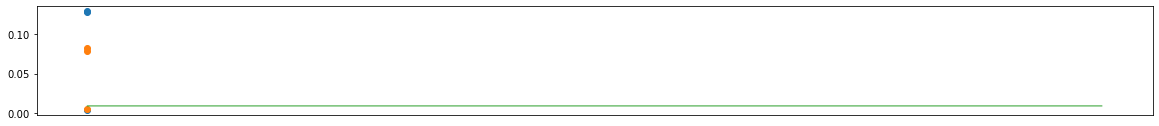

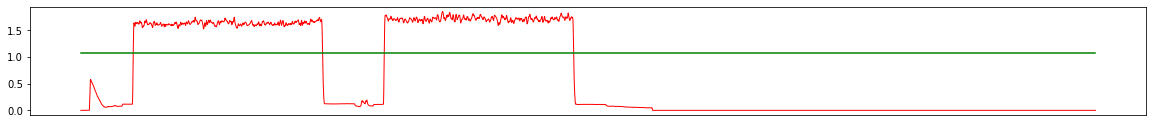

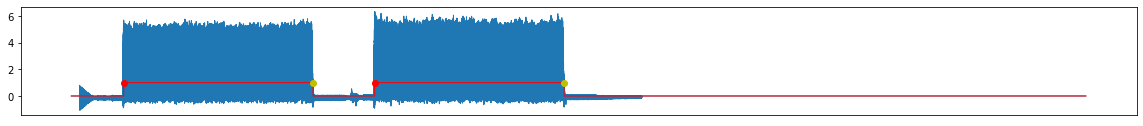

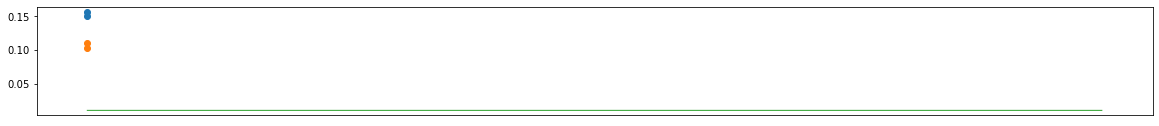

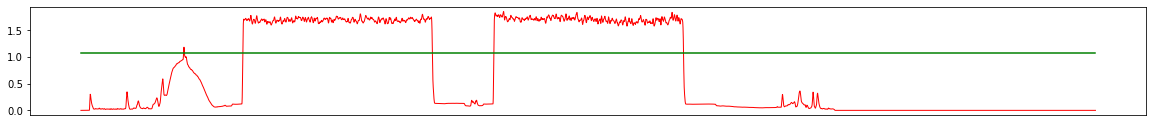

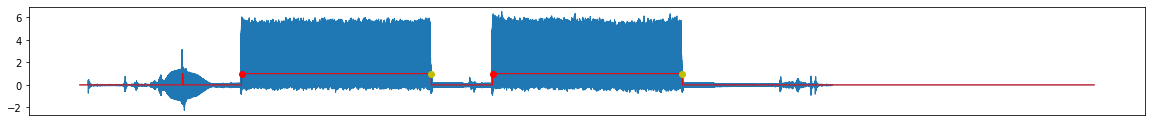

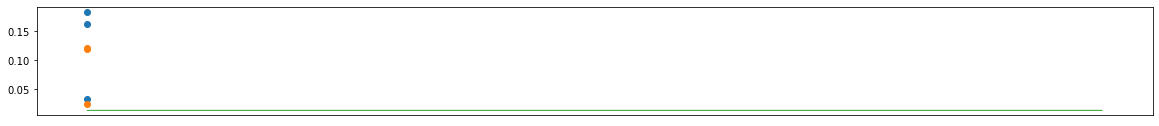

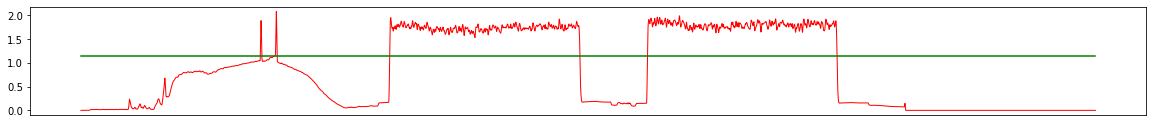

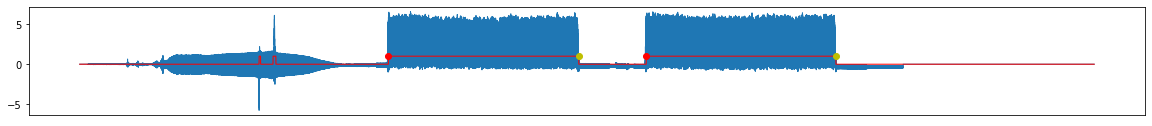

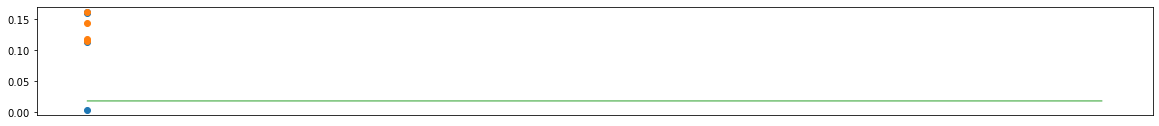

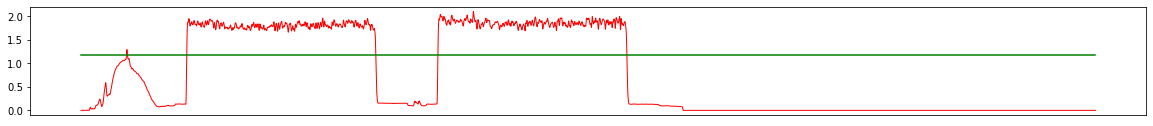

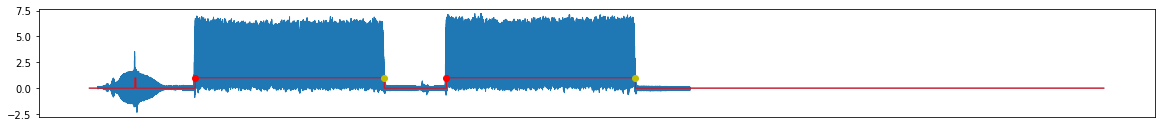

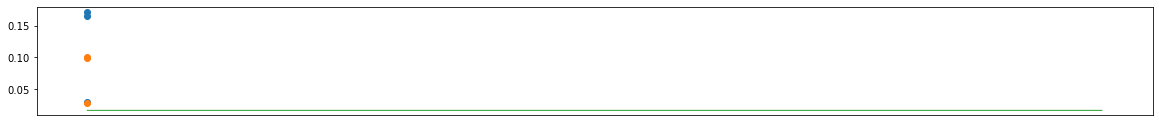

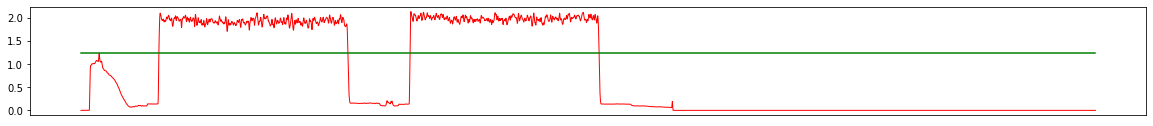

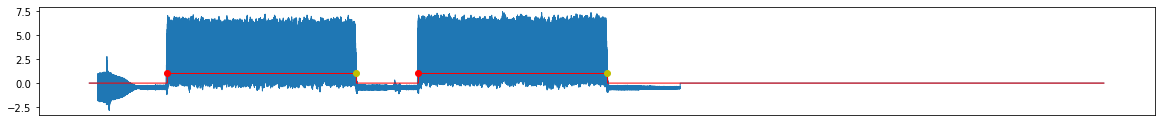

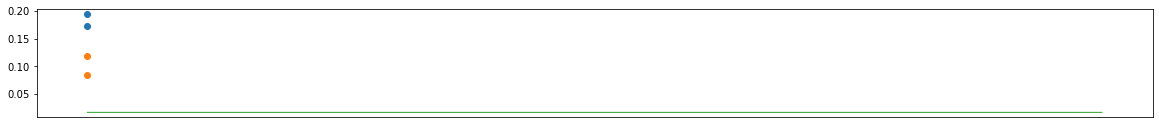

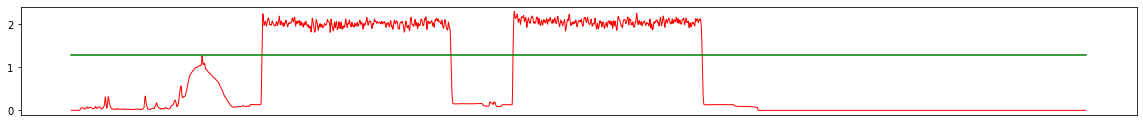

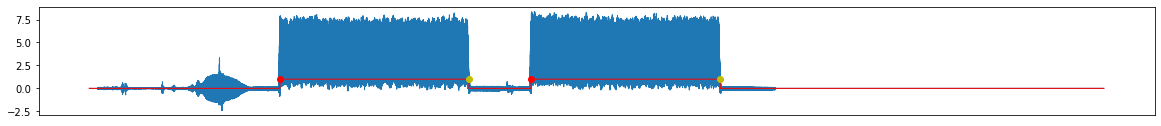

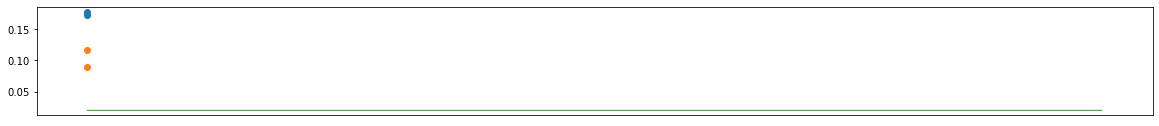

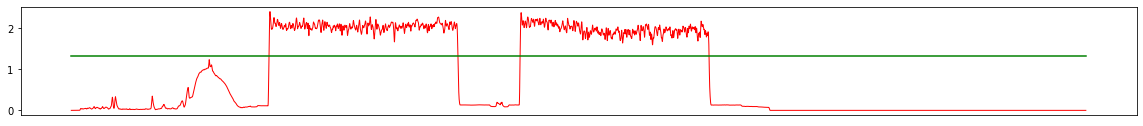

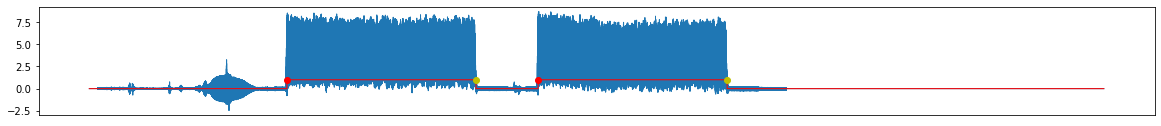

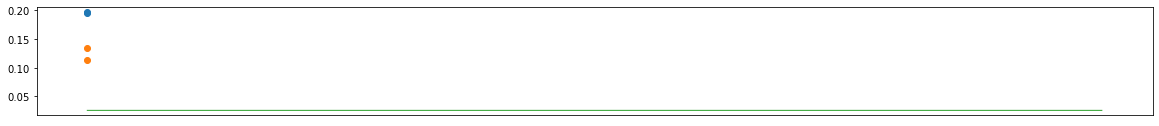

delete_index [   0    1   58   59   60   61  118  119  120  121  178  179  180  181
  238  239  240  241  298  299  300  301  358  359  360  361  418  419
  420  421  478  479  480  481  538  539  540  541  598  599  600  601
  658  659  660  661  718  719  720  721  778  779  780  781  838  839
  840  841  898  899  900  901  958  959  960  961 1018 1019 1020 1021
 1078 1079]
data_valid (1008, 1728, 3)
label (1008, 7)
generic_data/k7_wear.npy#######################################################


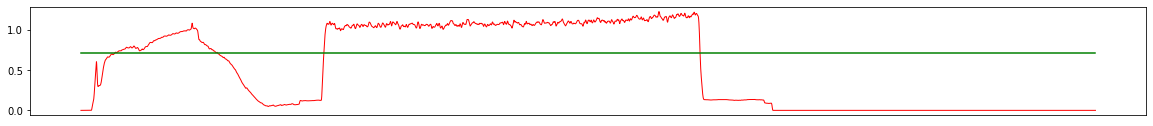

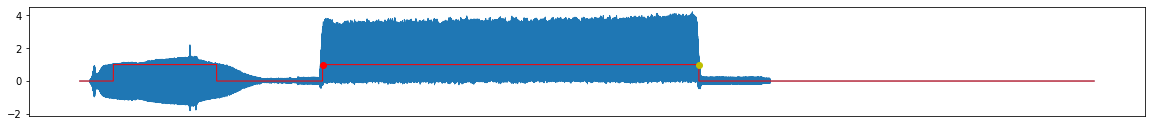

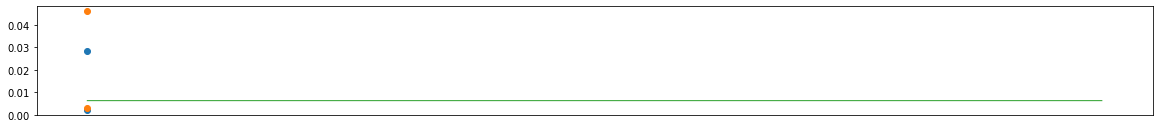

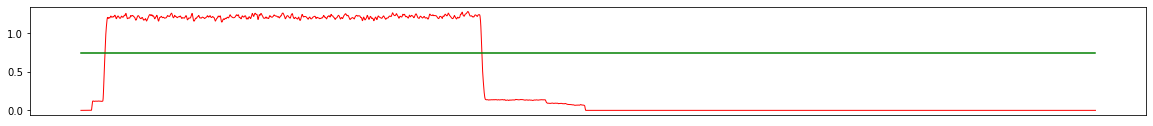

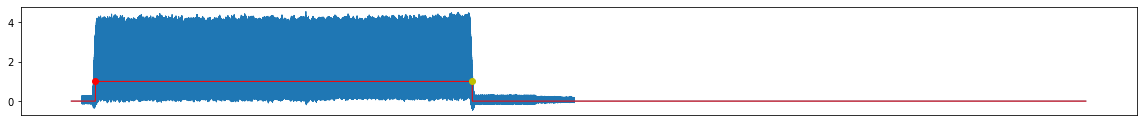

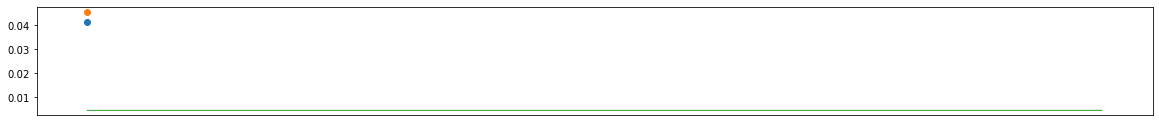

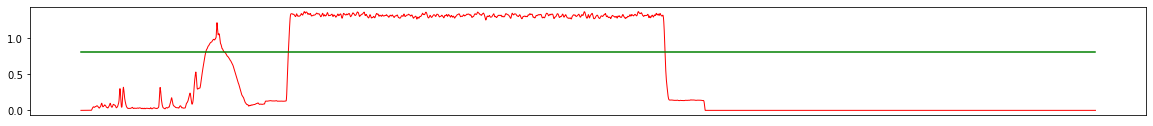

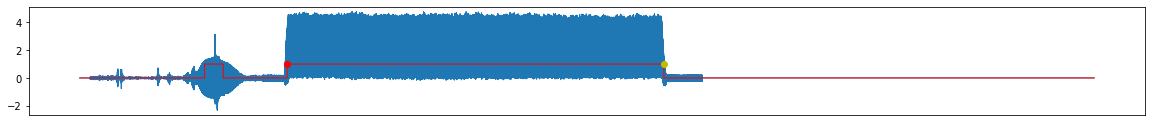

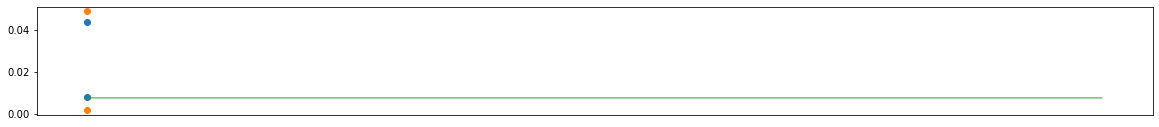

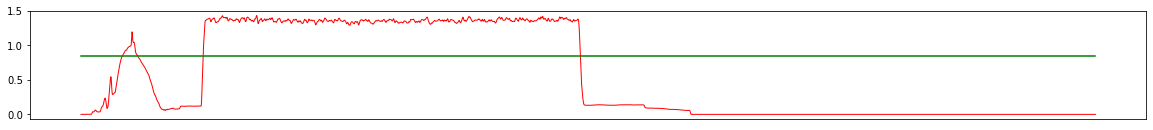

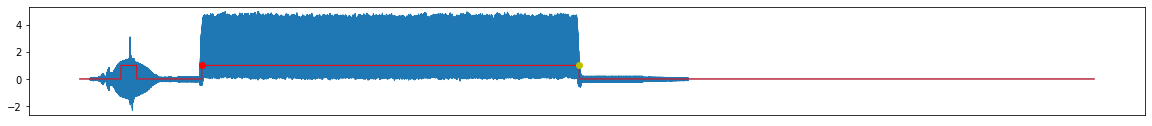

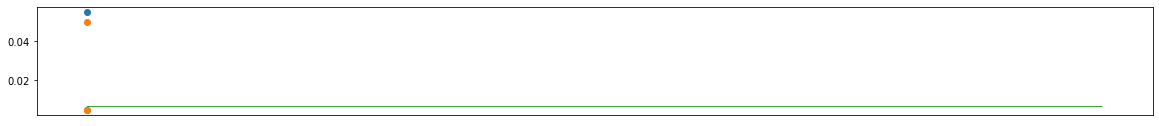

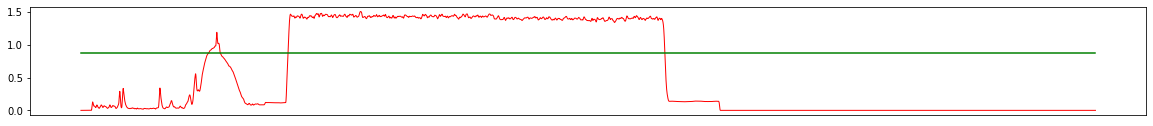

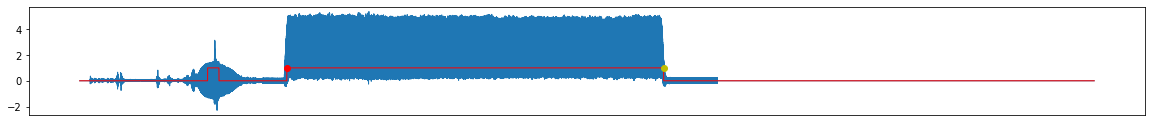

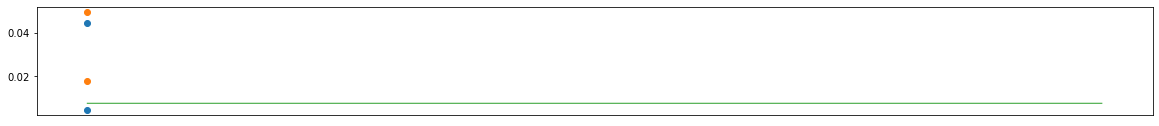

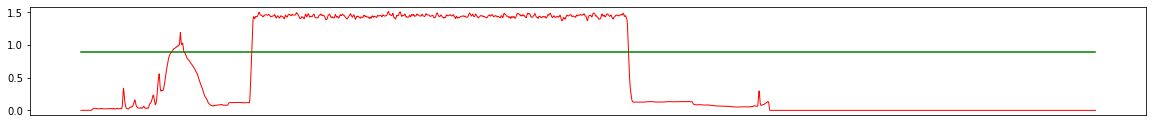

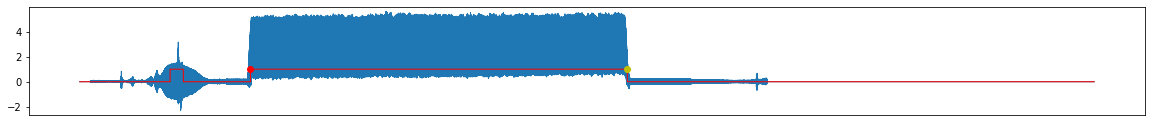

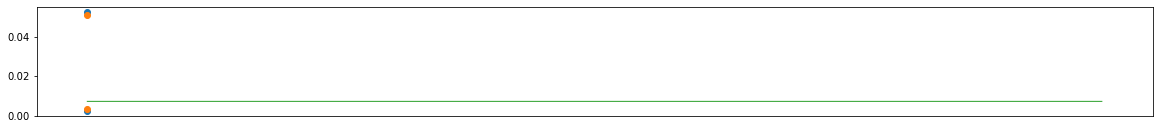

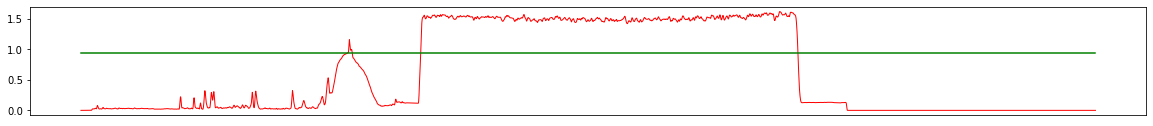

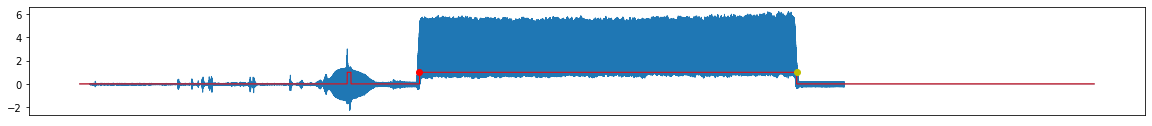

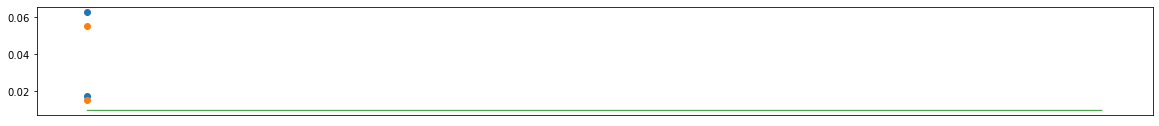

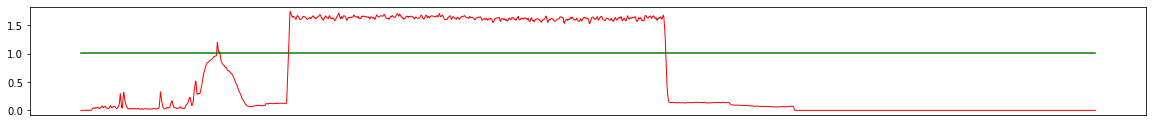

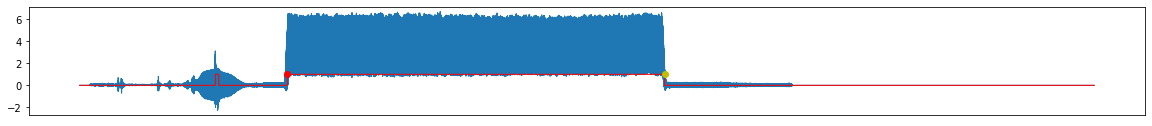

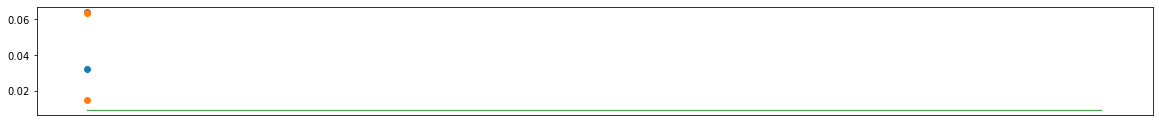

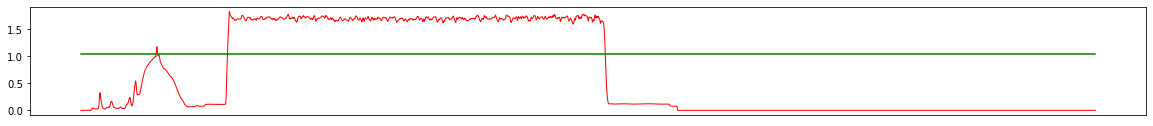

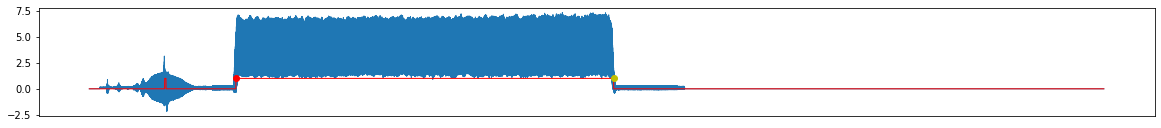

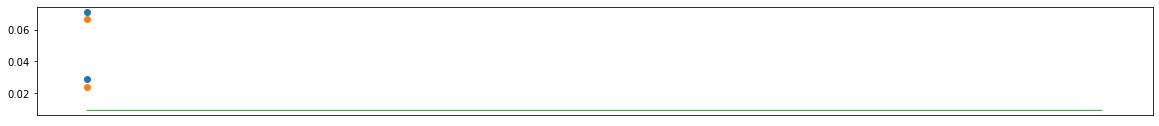

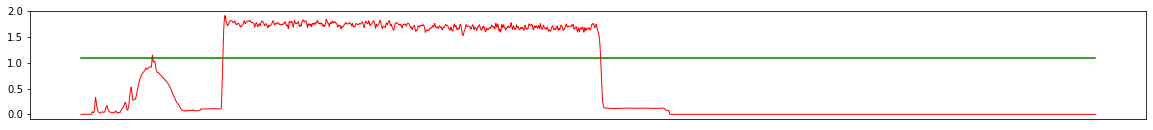

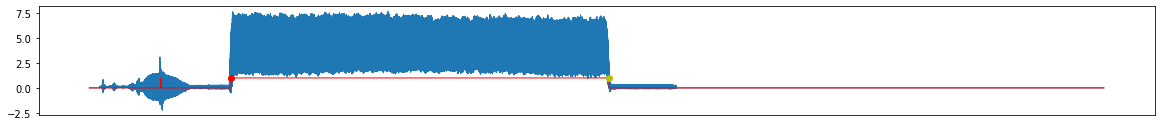

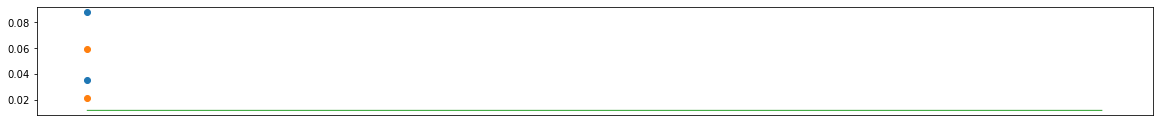

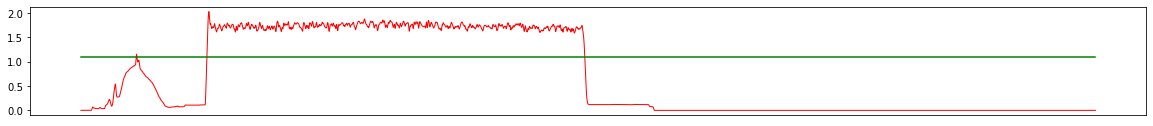

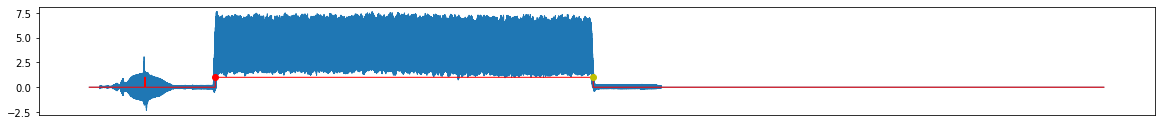

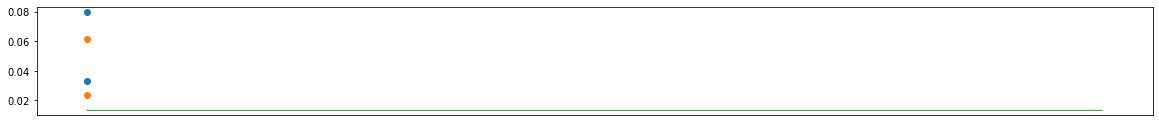

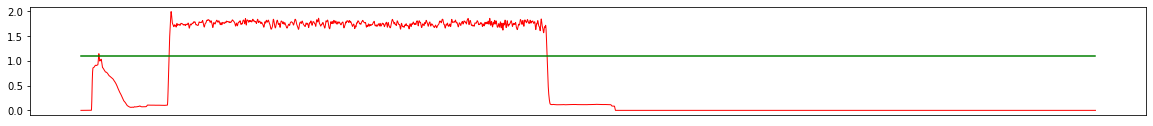

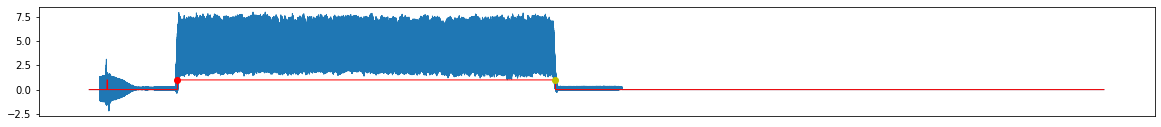

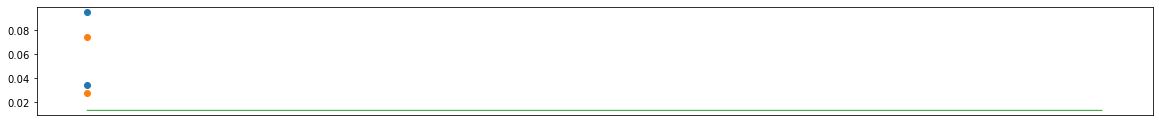

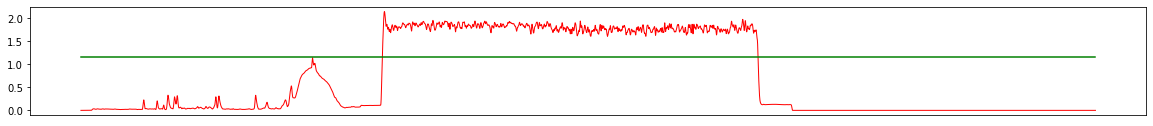

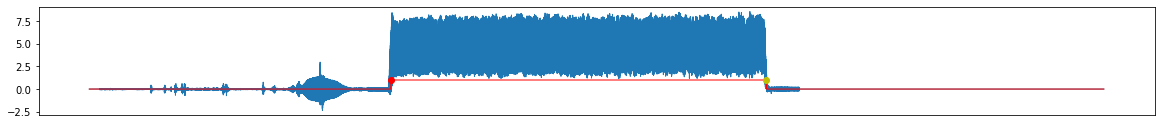

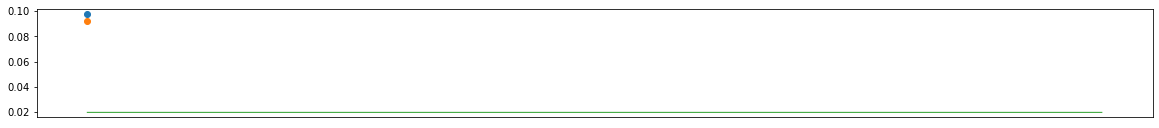

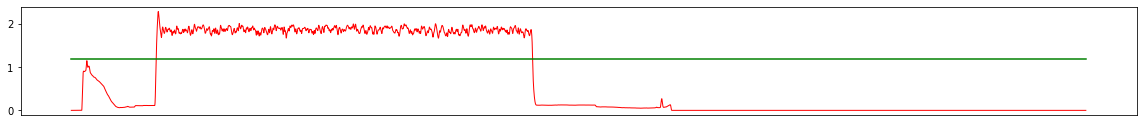

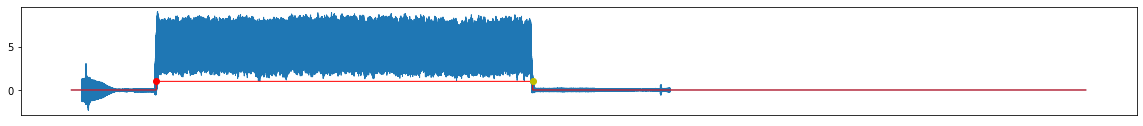

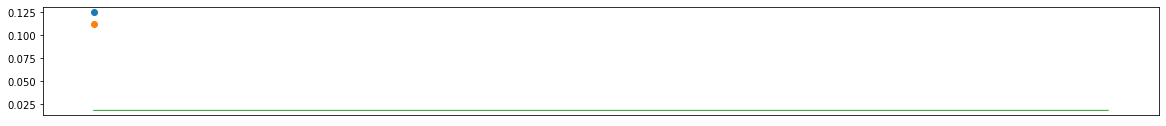

delete_index [   0    1  118  119  120  121  238  239  240  241  358  359  360  361
  478  479  480  481  598  599  600  601  718  719  720  721  838  839
  840  841  958  959  960  961 1078 1079 1080 1081 1198 1199 1200 1201
 1318 1319 1320 1321 1438 1439 1440 1441 1558 1559 1560 1561 1678 1679]
data_valid (1624, 1728, 3)
label (1624, 7)
generic_data/k8_wear.npy#######################################################


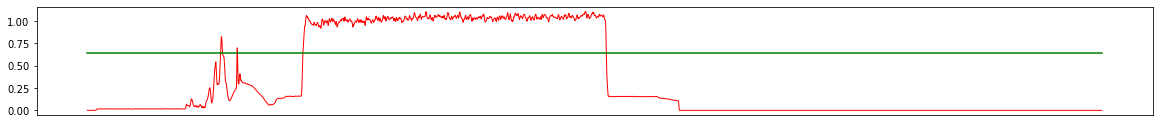

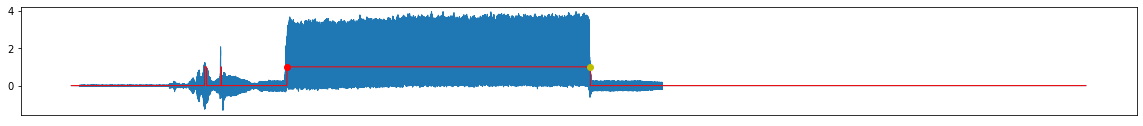

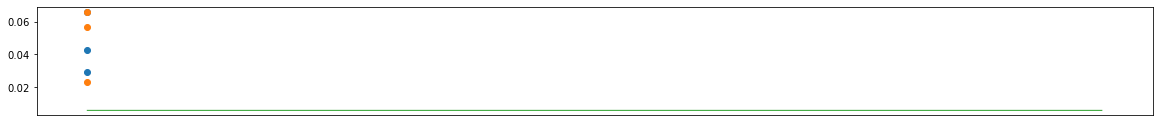

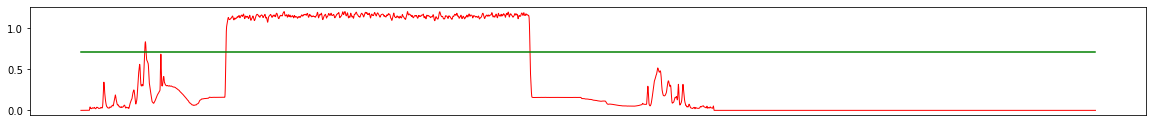

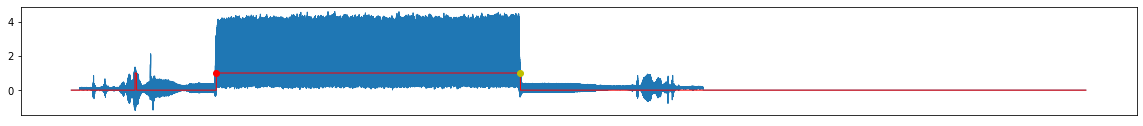

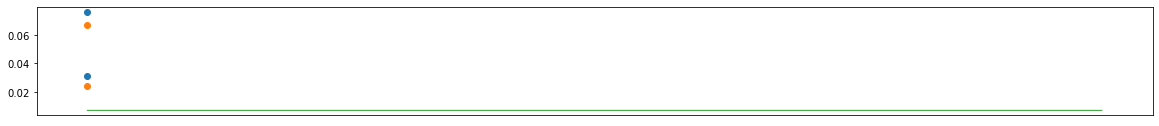

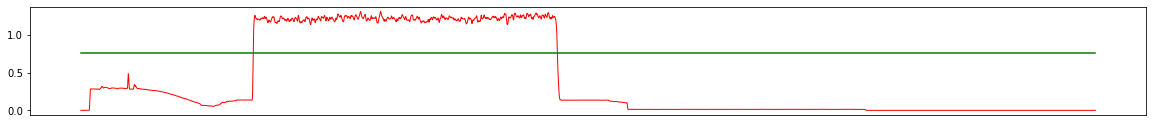

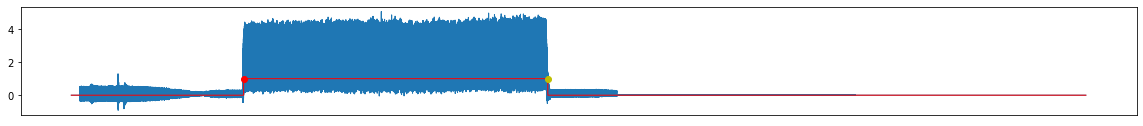

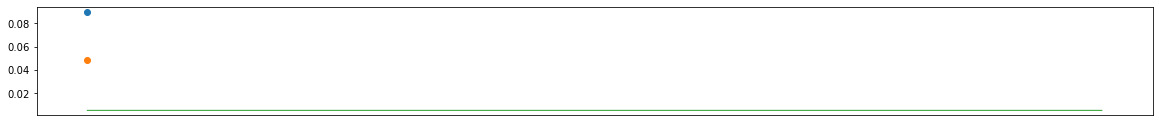

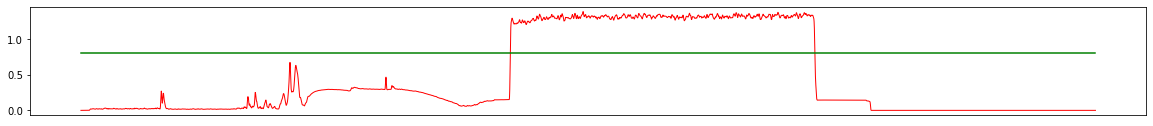

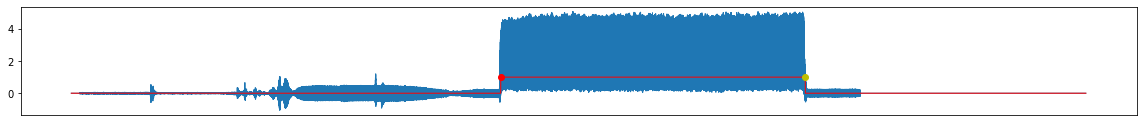

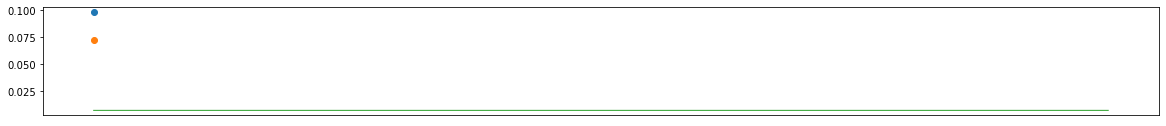

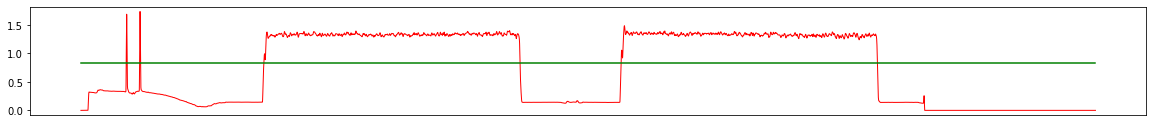

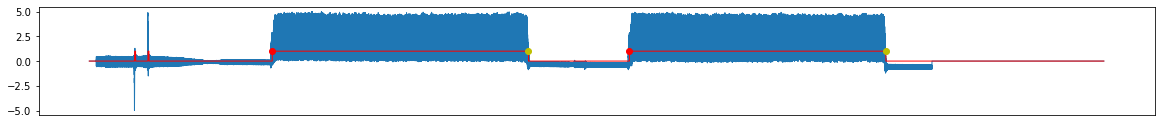

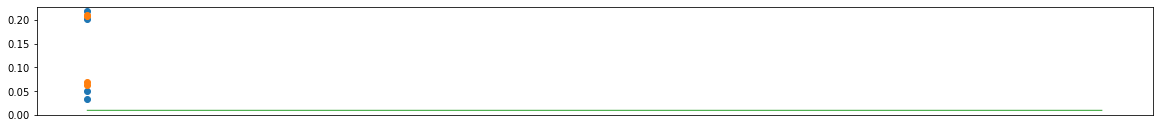

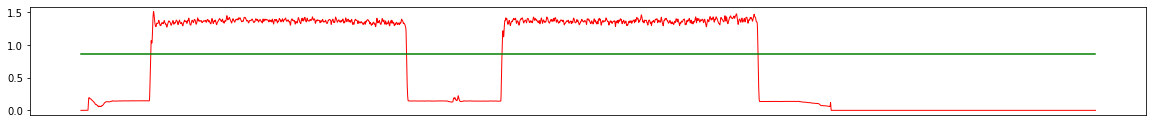

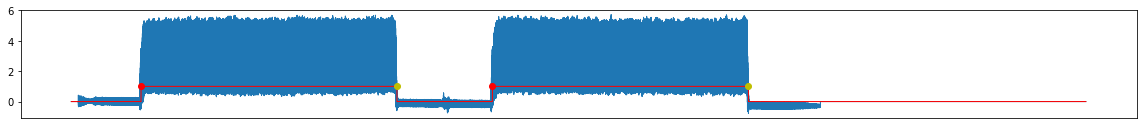

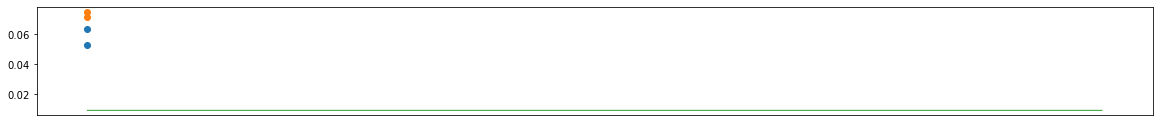

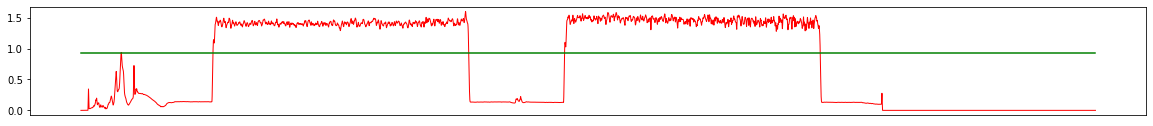

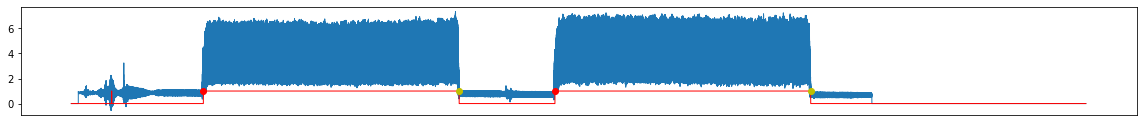

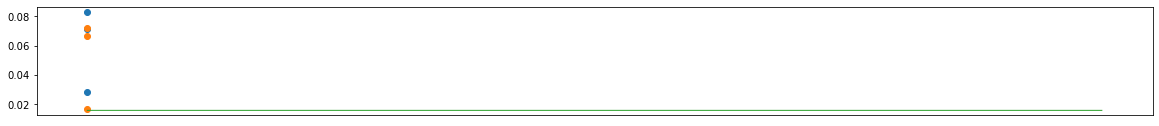

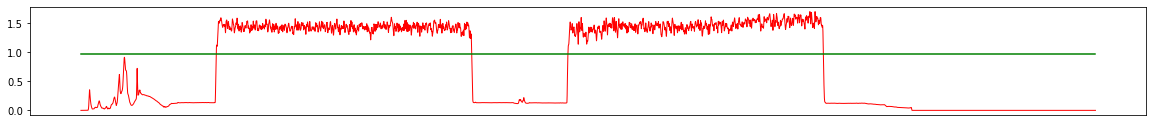

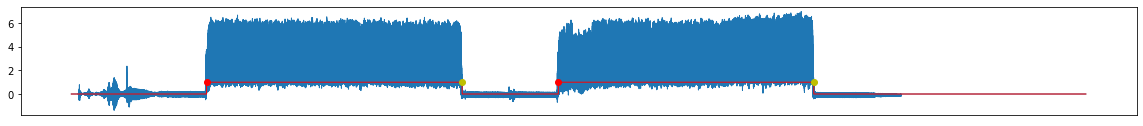

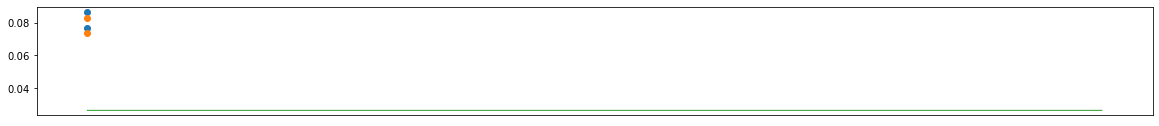

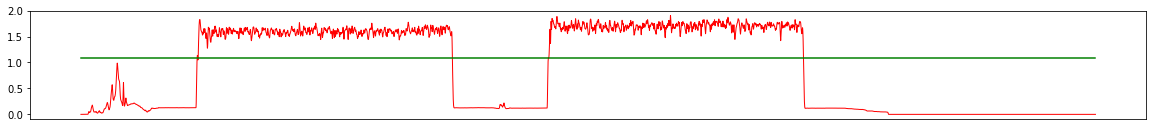

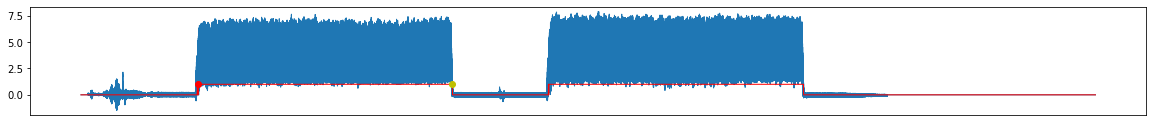

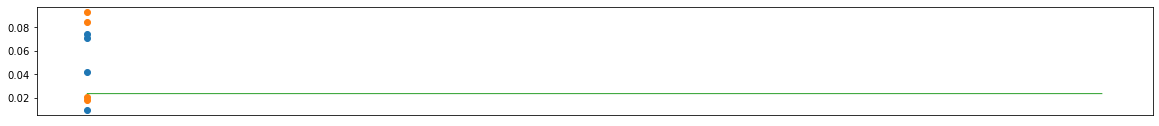

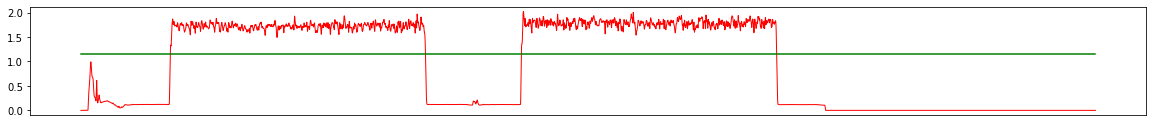

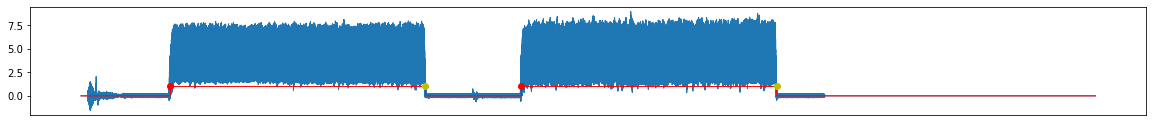

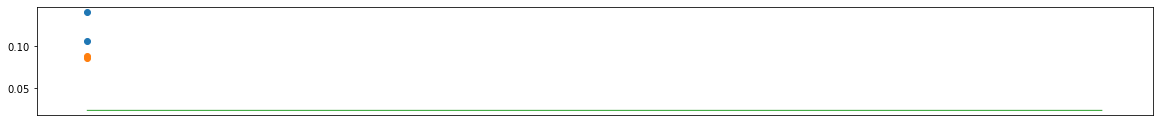

delete_index [   0    1  118  119  120  121  238  239  240  241  358  359  360  361
  478  479  480  481  538  539  540  541  598  599  600  601  658  659
  660  661  718  719  720  721  778  779  780  781  838  839  840  841
  898  899  900  901  958  959  960  961 1078 1079 1080 1081 1138 1139
 1140 1141 1198 1199]
data_valid (1140, 1728, 3)
label (1140, 7)
0.95803
-0.011312008
generic_data/k5_wear.npy#######################################################


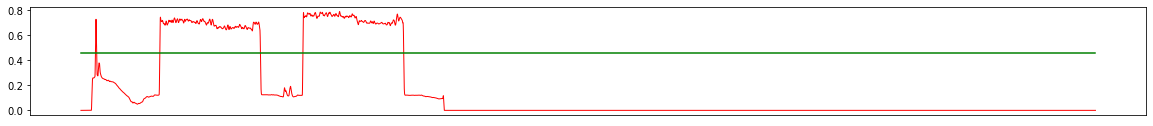

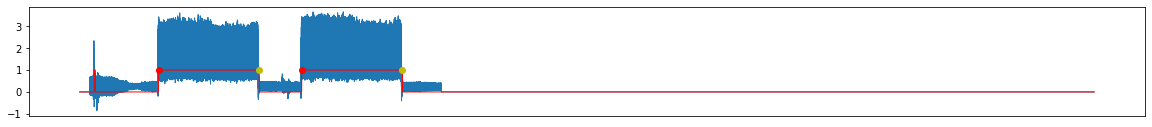

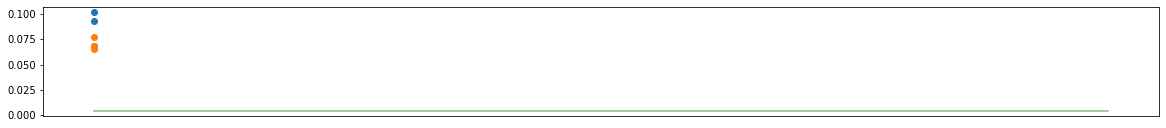

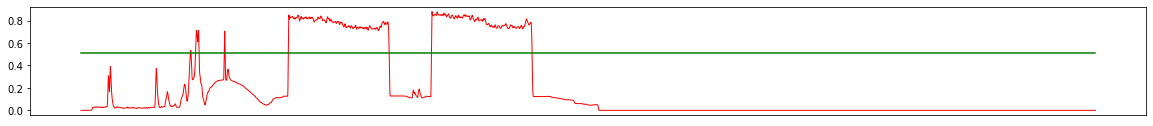

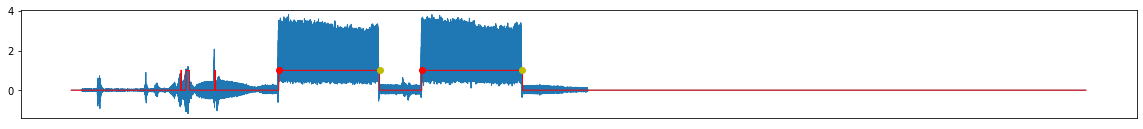

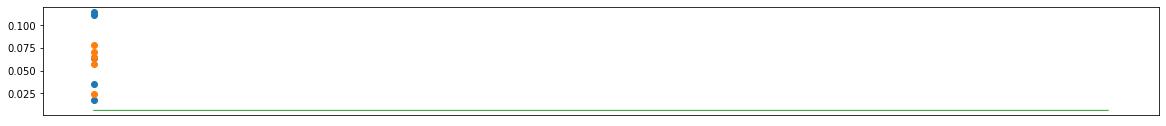

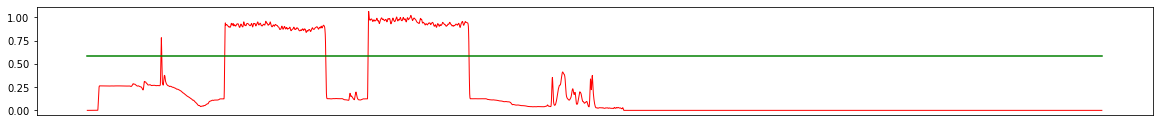

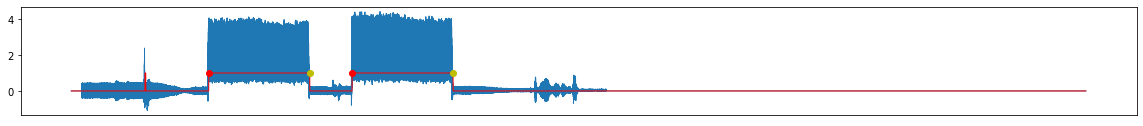

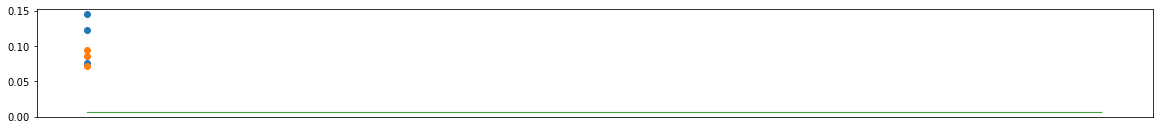

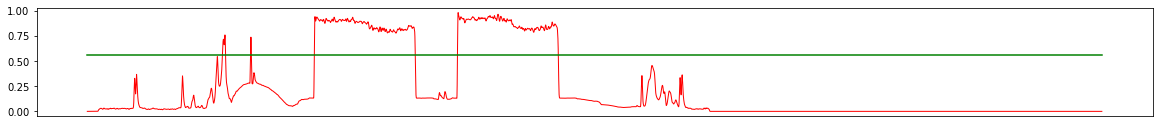

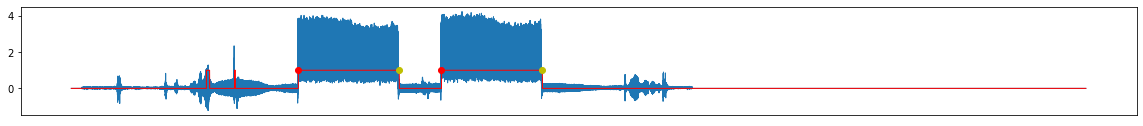

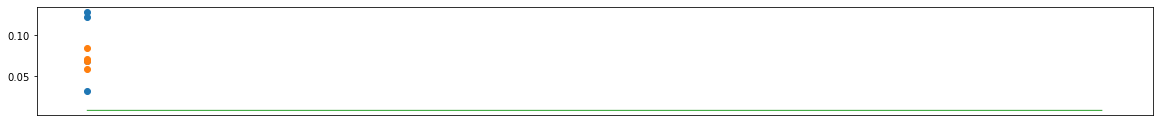

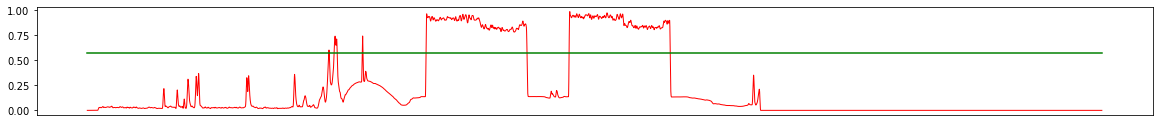

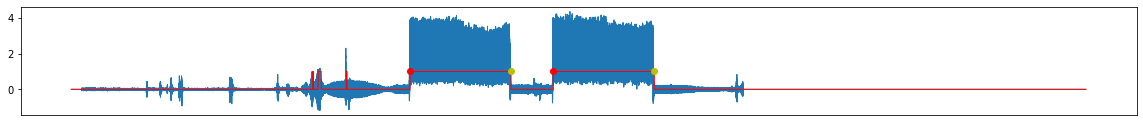

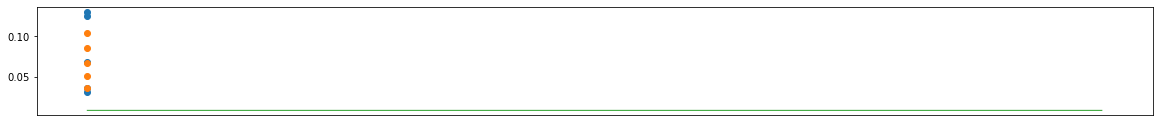

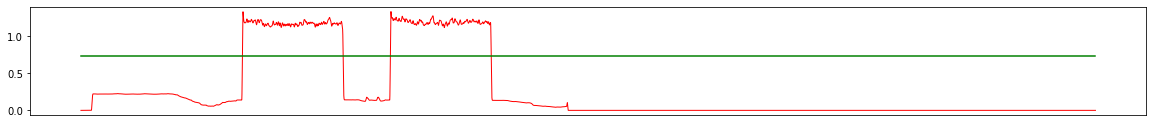

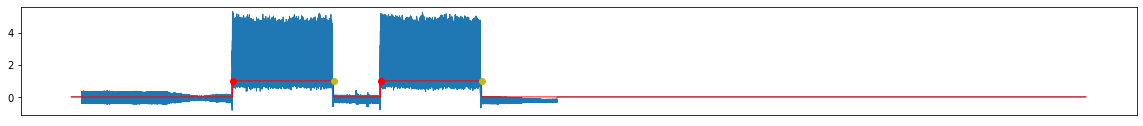

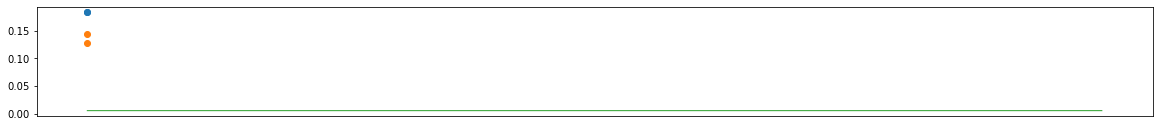

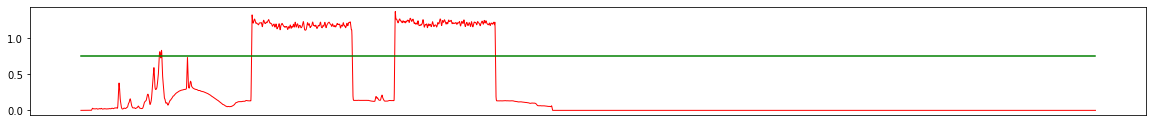

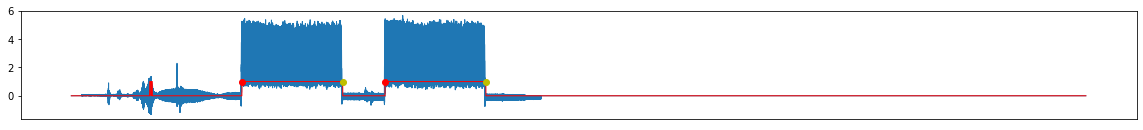

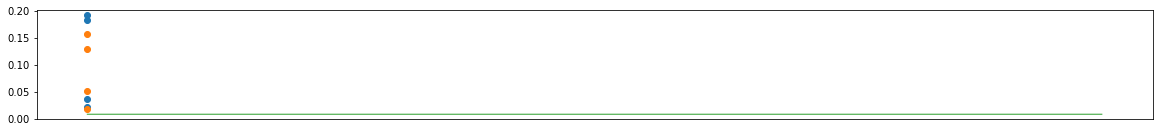

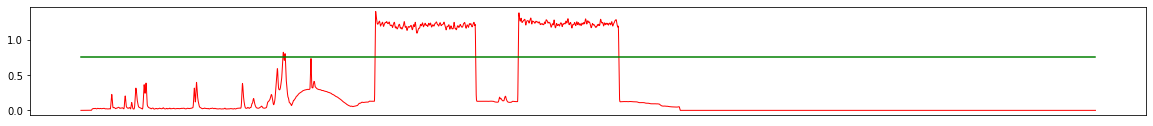

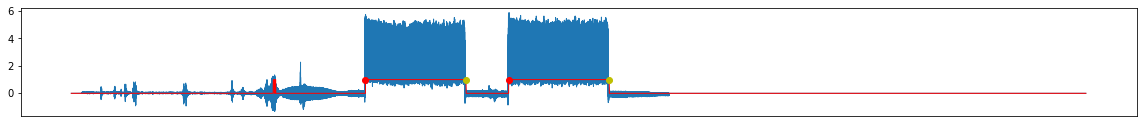

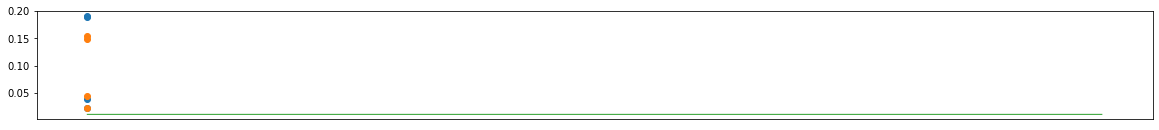

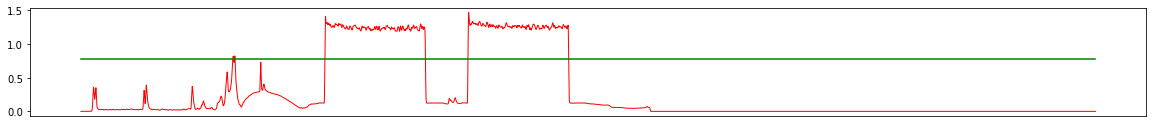

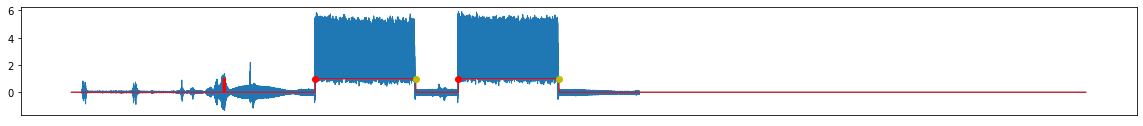

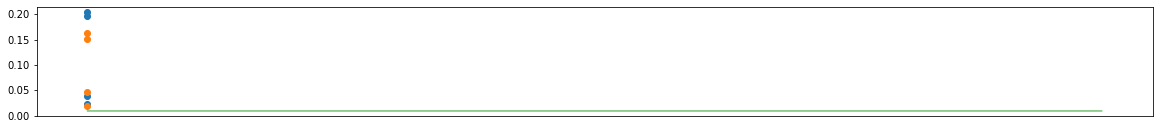

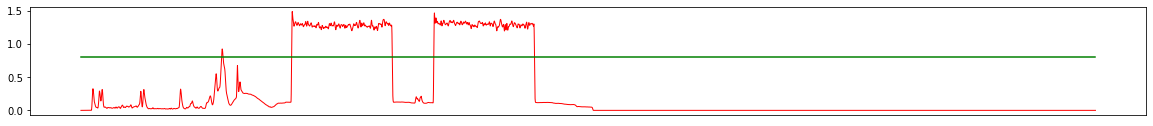

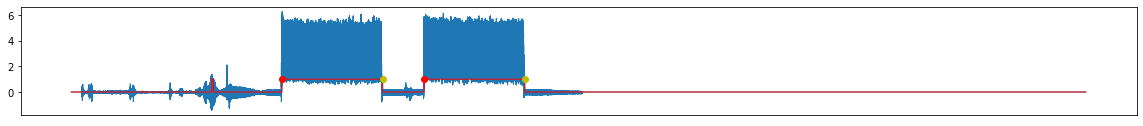

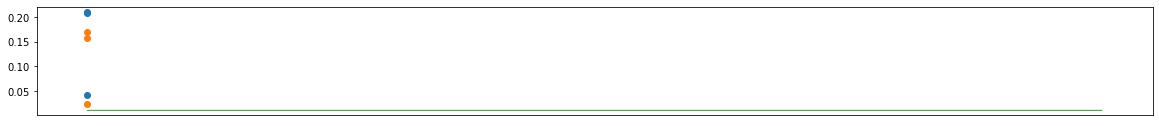

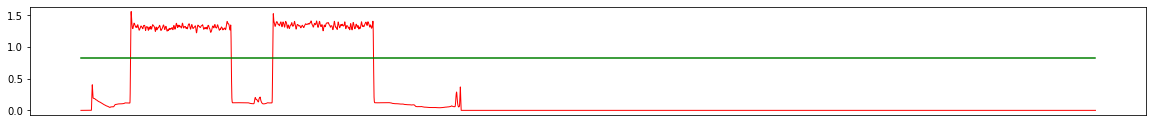

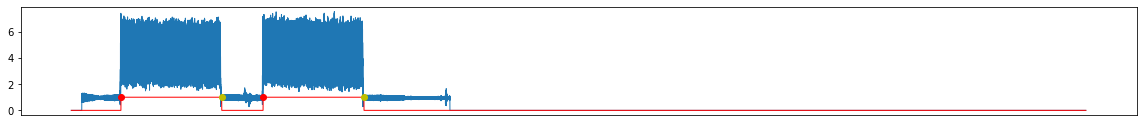

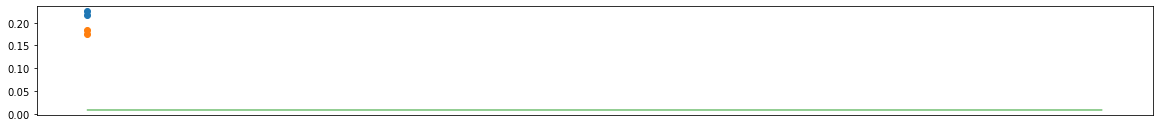

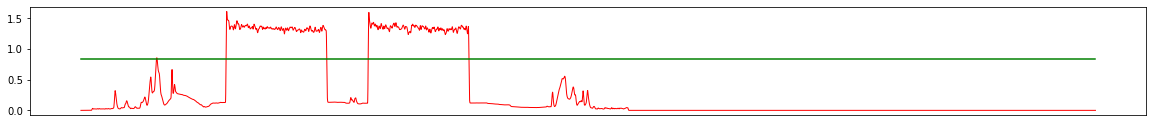

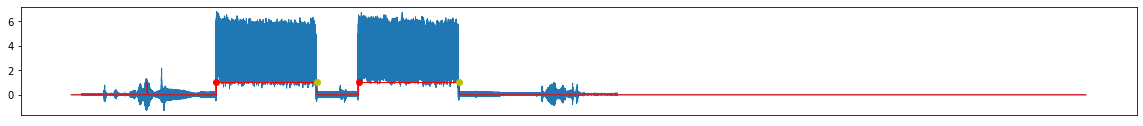

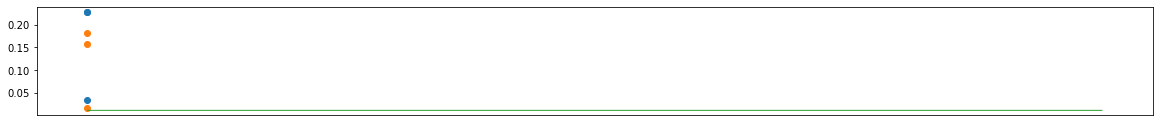

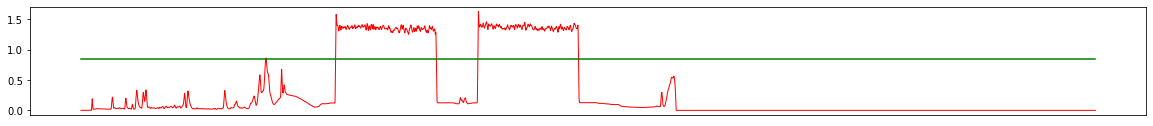

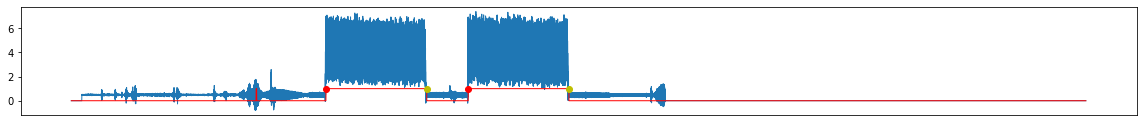

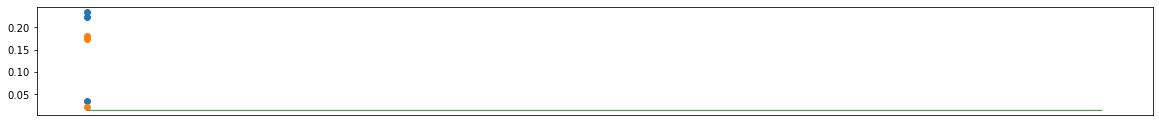

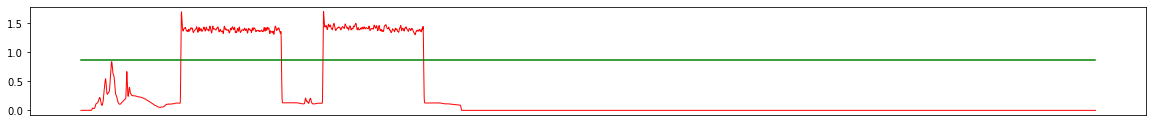

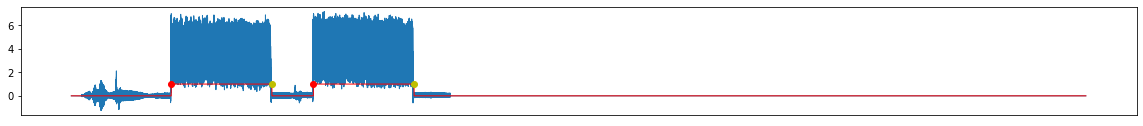

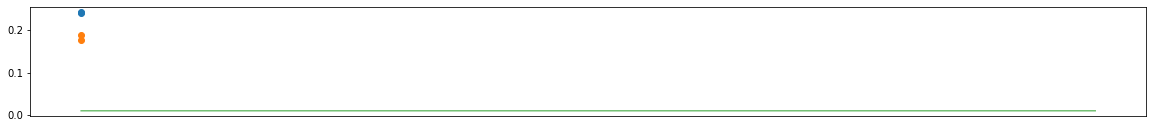

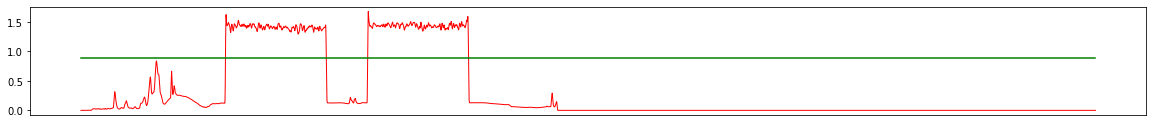

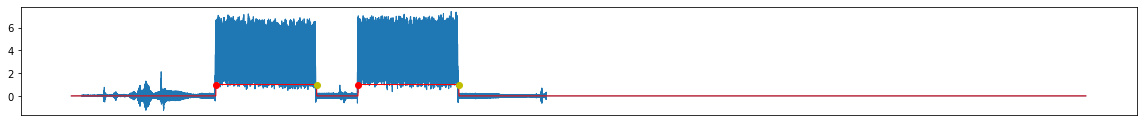

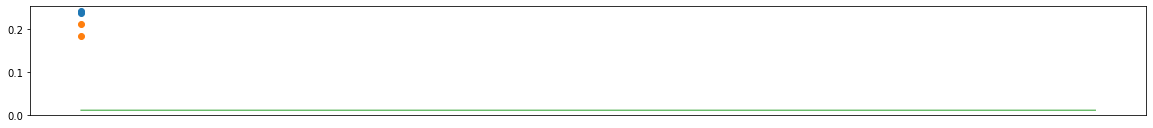

delete_index [   0    1   58   59   60   61  118  119  120  121  178  179  180  181
  238  239  240  241  298  299  300  301  358  359  360  361  418  419
  420  421  478  479  480  481  538  539  540  541  598  599  600  601
  658  659  660  661  718  719  720  721  778  779  780  781  838  839
  840  841  898  899  900  901  958  959  960  961 1018 1019 1020 1021
 1078 1079 1080 1081 1138 1139 1140 1141 1198 1199 1200 1201 1258 1259
 1260 1261 1318 1319 1320 1321 1378 1379 1380 1381 1438 1439 1440 1441
 1498 1499 1500 1501 1558 1559 1560 1561 1618 1619 1620 1621 1678 1679
 1680 1681 1738 1739 1740 1741 1798 1799]
data_valid (1680, 1728, 3)
label (1680, 7)
0.9162487
0.09215839


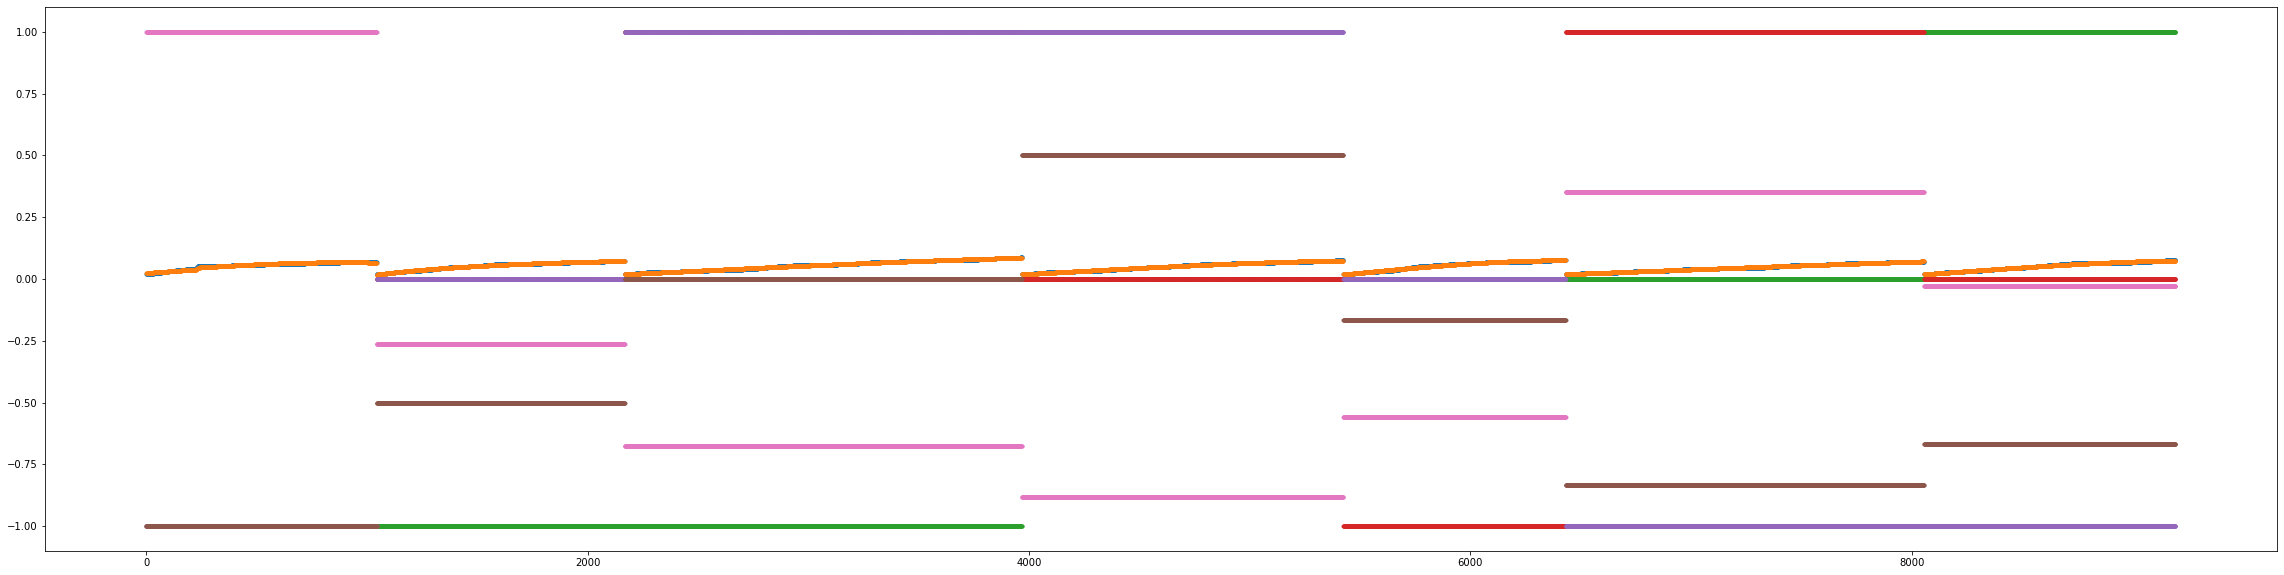

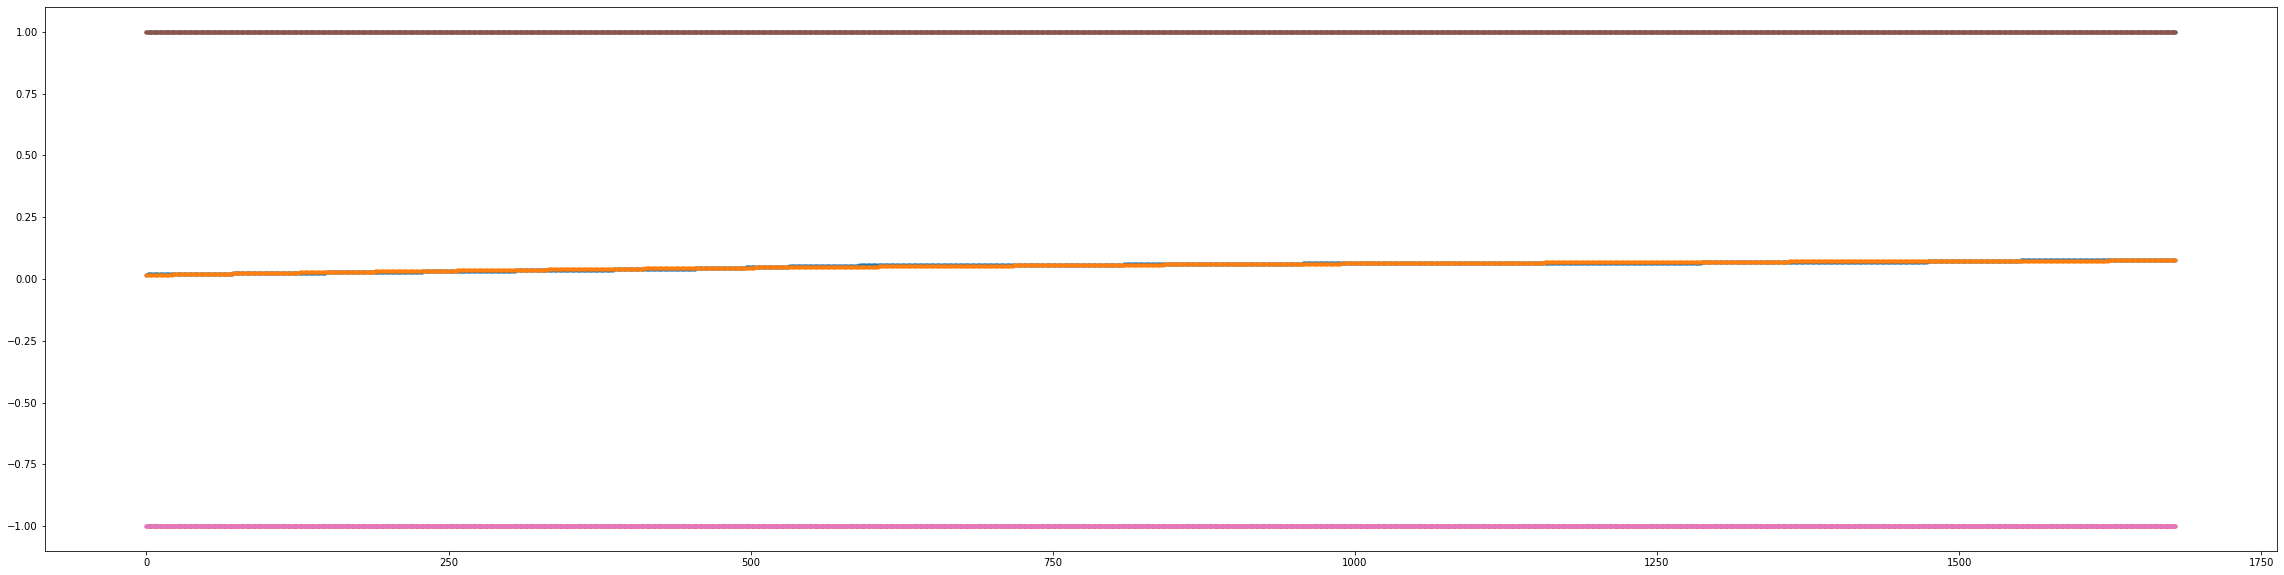

train_data (9196, 1536, 3)
train_label (9196, 7)
test_data (1680, 1536, 3)
test_label (1680, 7)
time1 =   921.5521819591522
complete


In [1]:
#数据集构建
#data读取，根据波动区域边缘（滑动标准差）+宽度+陡峭（滑动标准差的标准差）剔除无效数据
#由于每组的加工参数不同，将所有数据集降采样到同一频率
#k4中有一组开始时就处于铣削状态，std未能检测到，后续可能通过前方补零提高初始std捕获
#输出[23620, 5, 120, 3]  pyramid LSTM [30 4 5]
#2021.8.30
'''
各数据每周期点数
1.   200   400   800
2.   200   400   800
3.   200   400   800
4.   150   300   600
5.   120   240   480
6.   150   300   600
7.   150   300   600
8.   120   240   480
9.   120   240   480
10.  150   300   600
11.  150   300   600
'''

import numpy as np
import pandas as pd
import random
import scipy.signal
import time
import xlrd
import os
import matplotlib.pyplot as plt


INTERPOLATION_NUM = 120
TIME_STEPS=192*9    #所需数据时间序列长度
OUTPUT_STEPS=192*8
DATA_CHANNEL=3      #读取原始数据集的通道数

TRAINDATA_LOADPATH = ['tool_wear_2/k1-1/k1-1_', 'tool_wear_2/k2/k2-3_', 'tool_wear_2/k3/k3_', 'tool_wear_2/k4/k4_', 
                      'tool_wear_2/k6/k6_', 'tool_wear_2/k7/k7_', 'tool_wear_2/k8/k8_']
TRAINLABEL_LOADPATH = ['generic_data/k1-1_wear.npy', 'generic_data/k2_wear.npy', 'generic_data/k3_wear.npy', 'generic_data/k4_wear.npy', 
                       'generic_data/k6_wear.npy', 'generic_data/k7_wear.npy', 'generic_data/k8_wear.npy']
TESTDATA_LOADPATH = ['tool_wear_2/k5/k5_']
TESTLABEL_LOADPATH = ['generic_data/k5_wear.npy']

TRAINDATA_SAVEPATH = 'generic_data/train_data.npy' #训练集数据存储路径
TRAINLABEL_SAVEPATH = 'generic_data/train_label.npy' #训练集数据存储路径
TESTDATA_SAVEPATH = 'generic_data/test_data.npy' #测试集数据存储路径
TESTLABEL_SAVEPATH =  'generic_data/test_label.npy' #测试集标签存储路径

#0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
DOWNSAMPLING_FACTOR = np.array([0, 6.67, 6.67, 6.67, 5, 4, 5, 5, 4, 4, 5, 5])/ 4

TRAIN_DOWNSAMPLING = DOWNSAMPLING_FACTOR[[1, 2, 3, 4, 5, 7, 8]]
TEST_DOWNSAMPLING = [DOWNSAMPLING_FACTOR[6]]

####################################数据读取及处理###################################################################################
#将输入转化为LSTM可用的数据格式[-1, time, item]，插值。输出格式符合[-1, item]，不做改变,若作改变函数详见SOC_LSTM_prediction
def generate(seq_X, inter_num):
    X=[]
    total_num = np.shape(seq_X)[0]
    for i in range(inter_num-4):#注意这里需要和label同时改数量label_num
        X.append(seq_X[round(total_num*(i+2+1)/inter_num)-TIME_STEPS : round(total_num*(i+2+1)/inter_num)])#去除头尾
#         if i == 0:
#             print('0', round(total_num*(2+1)/inter_num)-TIME_STEPS)
#         if i == inter_num-5:
#             print('-1', total_num-round(total_num*(i+2+1)/inter_num))
#     print(np.shape(X))
    return np.array(X,dtype=np.float32)

#将原数据按比例随机分为训练集和测试集两部分，ratio测试集占比
def set_segmentation(data, ratio, label):
    segment_length = 100             #单个随机抽样区域长度
    total_num = np.shape(label)[0]
    data = np.array(data[:total_num-total_num%segment_length])
    label = np.array(label[:total_num-total_num%segment_length])
    train_label = []
    train_data = []
    train_index = []
    for i in range(0, total_num-segment_length, segment_length):
        index = random.sample(range(i,i+segment_length), int(segment_length*(1-ratio)))
        train_label.extend(label[index])
        train_data.extend(data[index])
        train_index.extend(index)
    test_label = np.delete(label, train_index, axis = 0)
    test_data = np.delete(data, train_index, axis = 0)
    return train_data, train_label, test_data, test_label

def effect_select(data, downsampling_factor):#选择有效信号。观察发现铣削部分的力信号波动大，波动区域边缘（滑动标准差）+宽度+陡峭（滑动标准差的标准差）
    data = np.concatenate([np.zeros([10000, 3]), data])#在信号前补零，避免起始点被漏掉
#     print('data', np.shape(data))
    v = np.ones([12])/12 
    data = np.convolve(data[:, 0], v, mode='same')#滤波
    data_std = pd.DataFrame(data).rolling(window = 800).std()
    data_std = data_std.rolling(window = 800).mean() #滑动标准差平均，信号为平台段
    data_std_std = data_std.rolling(window = 400).std() #滑动标准差平均标准差
    data_std_std = np.array(data_std_std.fillna(0))
    data_std = np.array(data_std.fillna(0))
    threshold = np.partition(data_std, np.shape(data_std)[0]-15000, axis=None)[np.shape(data_std)[0]-15000] #避免尖峰干扰
    threshold *= 0.6
    
    plt.figure(figsize=(20, 2))
    plt.plot(data_std, color = 'red', linewidth=1)
#     plt.plot([0, np.shape(data_std)[0]], [np.max(data_std)*0.3, np.max(data_std)*0.3], color = 'green')
    plt.plot([0, np.shape(data_std)[0]], [threshold, threshold], color = 'green')
    plt.xticks([])  #去掉横坐标值
    plt.show()

    data_std[data_std<threshold]=0
    data_std[data_std>threshold]=1

    #根据标准差提取边缘
    edge = np.append(data_std, data_std[-1]) - np.append(0, data_std)
    edge_start = np.argwhere(edge == 1).reshape([-1])
    edge_end = np.argwhere(edge == -1).reshape([-1])

    #检验边缘数量是否相符
    if np.shape(edge_start)[0] != np.shape(edge_end)[0]:
        print('起始边界与终止边界数量不统一')
        sys.exit(0)

    #根据宽度和标准差的标准差进一步筛选（边缘陡峭）
    edge_start_std_std = []
    edge_end_std_std = []
    for i in range(np.shape(edge_start)[0]):
        edge_start_std_std = np.append(edge_start_std_std, np.max(data_std_std[edge_start[i]-300 : edge_start[i]+300]))
        edge_end_std_std = np.append(edge_end_std_std, np.max(data_std_std[edge_end[i]-300 : edge_end[i]+300]))
#     edge_start_eff = edge_start[(edge_end - edge_start)>70000]
#     edge_end_eff = edge_end[(edge_end - edge_start)>70000]
    edge_start_eff = edge_start[((edge_end - edge_start)>70000)
                                & (edge_start_std_std > np.mean(data_std_std)*4)
                                & (edge_end_std_std > np.mean(data_std_std)*4)]
    edge_end_eff = edge_end[((edge_end - edge_start)>70000) 
                            & (edge_start_std_std > np.mean(data_std_std)*4) 
                            & (edge_end_std_std > np.mean(data_std_std)*4)]


    plt.figure(figsize=(20, 2))
    plt.plot(data,linewidth=1.0)
    plt.plot(data_std, color = 'red', linewidth=1.0)
    plt.plot(edge_start_eff,np.ones(np.shape(edge_start_eff)), 'ro')
    plt.plot(edge_end_eff,np.ones(np.shape(edge_end_eff)), 'yo')
    plt.xticks([])  #去掉横坐标值
    plt.show()

    plt.figure(figsize=(20, 2))
    plt.plot(edge_start_std_std,'o')
    plt.plot(edge_end_std_std,'o')
    plt.plot(np.ones(np.shape(data_std_std)[0])*np.mean(data_std_std)*4,linewidth=1.0)
    plt.xticks([])  #去掉横坐标值
    plt.show()
    
#     print('aa', edge_end_eff-edge_start_eff)
    return edge_start_eff-10000, edge_end_eff-10000#将在前端补的零去掉


def dataset_read(data_path, label_path, downsampling_factor):
    for j in range(len(label_path)):
        print(label_path[j] + '#######################################################')
        label = np.load(label_path[j]).astype(np.float32)
        delete_index = []
        #读取data
        for i in range(1, 20):   #忽略首次和末次切割
            data_path1 = data_path[j] + str(i) + '.txt'
            if os.path.exists(data_path1):  #检验文件是否存在
                train_data_read = np.loadtxt(data_path1, skiprows=20, encoding='gbk')[:, 1:]
                index = np.arange(0, np.shape(train_data_read)[0], downsampling_factor[j]).astype(np.int32)
                train_data_read = np.array(train_data_read)[index]
#                 print('train_data_read', np.shape(train_data_read))
                edge_start, edge_end = effect_select(train_data_read, downsampling_factor[j]) #输出铣削部分边界
#                 print('edge', edge_start, edge_end)
                
                if i >= 2:  #i的循环起始数，起始循环数+1
                    for k in range(np.shape(edge_start)[0]):
                        data_valid = np.concatenate([data_valid, generate(
                            train_data_read[edge_start[k]:edge_end[k]], int(INTERPOLATION_NUM/np.shape(edge_start)[0]))])######双labelmeijian???????对应
                else:
                    for k in range(np.shape(edge_start)[0]):
                        if k == 0:
                            data_valid = generate(train_data_read[edge_start[k]:edge_end[k]], int(INTERPOLATION_NUM/np.shape(edge_start)[0]))
                        else:
                            data_valid = np.concatenate([data_valid, generate(
                                train_data_read[edge_start[k]:edge_end[k]], int(INTERPOLATION_NUM/np.shape(edge_start)[0]))])######双labelmeijian???????对应
#                 print('data_valid', np.shape(data_valid))
                if np.shape(edge_start)[0] == 1: #需剔除的边缘label的索引序列
                    delete_index = np.append(delete_index, [(i-1)*INTERPOLATION_NUM, (i-1)*INTERPOLATION_NUM+1, 
                                                            (i-1+1)*INTERPOLATION_NUM-2, (i-1+1)*INTERPOLATION_NUM-1]) #删除有问题的数据,,i从1开始要减1
                elif np.shape(edge_start)[0] == 2:
                    delete_index = np.append(delete_index, [(i-1)*INTERPOLATION_NUM, (i-1)*INTERPOLATION_NUM+1, 
                                                            (i-1+0.5)*INTERPOLATION_NUM-2, (i-1+0.5)*INTERPOLATION_NUM-1,
                                                            (i-1+0.5)*INTERPOLATION_NUM, (i-1+0.5)*INTERPOLATION_NUM+1,
                                                            (i-1+1)*INTERPOLATION_NUM-2, (i-1+1)*INTERPOLATION_NUM-1]) #删除有问题的数据
                else:
                    print('#################error###################################')
                    sys.exit(1)
            else:
                if i<8: 
                    delete_index = np.append(delete_index, list(range((i-1)*INTERPOLATION_NUM, i*INTERPOLATION_NUM))) #删除有问题的数据
                else:
                    break
        print('delete_index', np.int32(delete_index))
        label = np.delete(label,np.int32(delete_index),axis = 0)
        print('data_valid', np.shape(data_valid))
        print('label', np.shape(label))
                
        if j >= 1:
            data_valid_total = np.concatenate([data_valid_total, data_valid])
            label_total = np.concatenate([label_total, label])
        else:
            data_valid_total = data_valid
            label_total = label
        
#         print('data_valid_total', np.shape(data_valid_total))
    data_valid_total[:, :, 0] = (data_valid_total[:, :, 0] + 7)/25
    data_valid_total[:, :, 1] = (data_valid_total[:, :, 1] + 15)/22
    data_valid_total[:, :, 2] = (data_valid_total[:, :, 2] + 5)/15
    print(np.max(data_valid_total))
    print(np.min(data_valid_total))
    return data_valid_total, label_total

def signal_start_detection(signal):
    output_signal = np.zeros([np.shape(signal)[0], OUTPUT_STEPS, np.shape(signal)[2]])
#     print('output_signal', np.shape(output_signal))
#     print('signal', np.shape(signal))
    for i in range(np.shape(signal)[0]):
        min_index = np.argmin(signal[i, :TIME_STEPS-OUTPUT_STEPS-1, 0])
#         print(min_index)
#         plt.plot(signal[i, :, 0])
#         plt.scatter(min_index, signal[i, min_index, 0])
#         plt.show()
        output_signal[i] = signal[i, min_index : min_index+OUTPUT_STEPS]
    return output_signal

###################################数据存储##########################################################################################
time_start = time.time()
train_data, train_label = dataset_read(TRAINDATA_LOADPATH, TRAINLABEL_LOADPATH, TRAIN_DOWNSAMPLING)
# train_data = train_data[::2]
# train_label = train_label[::2]
train_data = signal_start_detection(train_data)
test_data, test_label = dataset_read(TESTDATA_LOADPATH, TESTLABEL_LOADPATH, TEST_DOWNSAMPLING)
# test_data = test_data[::2]
# test_label = test_label[::2]
test_data = signal_start_detection(test_data)

plt.figure(figsize=(40, 10))
plt.plot(train_label, '.')
plt.show()
plt.figure(figsize=(40, 10))
plt.plot(test_label, '.')
plt.show()

print('train_data', np.shape(train_data))
print('train_label', np.shape(train_label))
print('test_data', np.shape(test_data))
print('test_label', np.shape(test_label))

np.save(TRAINDATA_SAVEPATH,train_data)
np.save(TRAINLABEL_SAVEPATH,train_label)
np.save(TESTDATA_SAVEPATH,test_data)
np.save(TESTLABEL_SAVEPATH,test_label)

print('time1 =  ', time.time()-time_start)
print('complete')


## empirical data w=b0* (v^b1)* (f^b2)* (L^b3) one_hot 2021.10.12

[ 0.1         2.86666667  5.63333333  8.4        11.16666667 13.93333333
 16.7        19.46666667 22.23333333 25.        ]
time_condition (87, 3) (10, 3)
wear (87,) (10,)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_v (InputLayer)           [(1, 1)]             0                                            
__________________________________________________________________________________________________
inputs_f (InputLayer)           [(1, 1)]             0                                            
__________________________________________________________________________________________________
inputs_t (InputLayer)           [(1, 1)]             0                                            
__________________________________________________________________________________________________
experical_equation1 

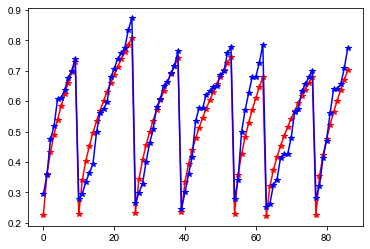

loss_train_avg 0.002250454


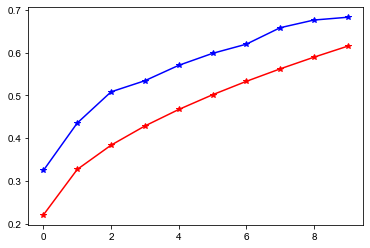

loss_test_avg 0.009836927
[array([0.07652419], dtype=float32), array([0.5484292], dtype=float32), array([0.06674983], dtype=float32), array([0.3472614], dtype=float32)]
mape_train:  0.08234282 mape_test:  0.1871689 fpe_average_test:  9.483284403880438 fpe_max_test:  12.05945650736491
time1 =   63.14609503746033
complete


In [5]:
#
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, backend, regularizers
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import random
import xlrd
import xlwt
import time
import os

CONDITION_LOADPATH = 'tool_wear_2/milling_condition.xlsx'
LABEL_LOADPATH = ['tool_wear_2/k1-1/flank_wear.xls', 'tool_wear_2/k2/flank_wear.xls', 'tool_wear_2/k3/flank_wear.xls', 
                  'tool_wear_2/k4/flank_wear.xls', 'tool_wear_2/k5/flank_wear.xls','tool_wear_2/k6/flank_wear.xls', 
                  'tool_wear_2/k7/flank_wear.xls', 'tool_wear_2/k8/flank_wear.xls']
PARAMETER_SAVEPATH = 'tool_wear_2/multiplicative_guided_parameter.npy'
RESULT_SAVEPATH = 'exp_data2/physicsbased_result.npy'

CUTTING_TIME = [250, 250, 250, 162.5, 140, 168.75, 262.5, 240]
# TRAIN_INDEX = [1, 2, 3, 4, 6, 7, 8]
# TEST_INDEX = [5]

TRAIN_INDEX = [1, 2, 3, 4, 6, 7, 8]
TEST_INDEX = [5]

BATCH_SIZE = 82
TRAIN_EPISODE = 20

class experical_equation(layers.Layer):
    # T = c/(pow(v, p)*pow(f, q)*pow(d, n))
    # https://blog.csdn.net/qq_37285386/article/details/101697758
    def __init__(self, name = 'experical_equation', **kwargs): #初始化方法
        super(experical_equation,self).__init__(name = name, **kwargs) #必须要的初始化自定义层
    def build(self, input_shape): #为Mylayer建立一个可训练的权重
        super(experical_equation,self).build(input_shape)
        self.b0=self.add_weight(name='b0',shape=[1], trainable=True, initializer='uniform')
        self.b1=self.add_weight(name='b1',shape=[1], trainable=True, initializer='uniform')
        self.b2=self.add_weight(name='b2',shape=[1], trainable=True, initializer='uniform')
        self.b3=self.add_weight(name='b3',shape=[1], trainable=True, initializer='uniform')
    def call(self, v, f, t): #call函数里就是定义了对x张量的计算图，且x只是一个形式，所以不能被事先定义
        w = self.b0* pow(v, self.b1)* pow(f, self.b2)* pow(t, self.b3) + 0.2
#         w = tf.math.log(self.b0)+self.b1*tf.math.log(v)+self.b2*tf.math.log(f)+self.b3*tf.math.log(t)
        return w
    def compute_output_shape(self,input_shape):
        return (input_shape[0], 1)
    def get_weights(self):
        weights = super(experical_equation, self).get_weights()
        return weights

def dataReading_sampleGenerating(condition_loadpath, label_loadpath):
    samples_trian = []
    wear_train = []
    workbook = xlrd.open_workbook(condition_loadpath)
    sheet1 = workbook.sheet_by_index(0)         #用索引取第一个sheet
    v = np.array(sheet1.col_values(0, start_rowx=0, end_rowx=11)).astype('float32')
    f = np.array(sheet1.col_values(3, start_rowx=0, end_rowx=11)).astype('float32')
    for i in range(len(TRAIN_INDEX)):
        workbook = xlrd.open_workbook(label_loadpath[TRAIN_INDEX[i]-1])
        sheet1 = workbook.sheet_by_index(0)         #用索引取第一个sheet
        wear1 = np.array(sheet1.col_values(0)).astype('float32')
        wear2 = np.array(sheet1.col_values(1)).astype('float32')
        wear = np.mean([wear1, wear2], axis = 0)
#         print('wear', np.shape(wear))
        time = np.linspace(1, CUTTING_TIME[TRAIN_INDEX[i]-1], num = np.shape(wear)[0])/10
        v_feature = np.ones(np.shape(time)) * v[TRAIN_INDEX[i]-1]
        f_feature = np.ones(np.shape(time)) * f[TRAIN_INDEX[i]-1]
        samples = np.transpose([time, v_feature, f_feature])
        if i == 0:
            samples_trian = samples
            wear_train = wear
        else:
            samples_trian= np.append(samples_trian, samples, axis =0)
            wear_train = np.append(wear_train, wear, axis = 0)
            
    workbook = xlrd.open_workbook(label_loadpath[TEST_INDEX[0]-1])
    sheet1 = workbook.sheet_by_index(0)         #用索引取第一个sheet
    wear1 = np.array(sheet1.col_values(0)).astype('float32')
    wear2 = np.array(sheet1.col_values(1)).astype('float32')
    wear = np.mean([wear1, wear2], axis = 0)
#         print('wear', np.shape(wear))
    time = np.linspace(1, CUTTING_TIME[TEST_INDEX[0]-1], num = np.shape(wear)[0])/10
    print(time)
    v_feature = np.ones(np.shape(time)) * v[TEST_INDEX[0]-1]
    f_feature = np.ones(np.shape(time)) * f[TEST_INDEX[0]-1]
    samples_test = np.transpose([time, v_feature, f_feature])
    wear_test = wear
    return samples_trian, wear_train, samples_test, wear_test
    
def model_construct_training(input_data, output_data):
    inputs_v = layers.Input(shape=1, batch_size = BATCH_SIZE, name='inputs_v')
    inputs_f = layers.Input(shape=1, batch_size = BATCH_SIZE, name='inputs_f')
    inputs_t = layers.Input(shape=1, batch_size = BATCH_SIZE, name='inputs_t')
    outputs = experical_equation(name = 'experical_equation1')(inputs_v, inputs_f, inputs_t)
    predictor = models.Model(inputs=[inputs_v, inputs_f, inputs_t], outputs=outputs)
    predictor.summary()

    for i in range(TRAIN_EPISODE):
        adam = keras.optimizers.Adam(lr=0.01)
        predictor.compile(optimizer=adam, loss = 'mse')
        history = predictor.fit([input_data[:, 0], input_data[:, 1], input_data[:, 2]], output_data, batch_size=BATCH_SIZE, epochs=3, verbose=2)
        adam = keras.optimizers.Adam(lr=0.002)
        predictor.compile(optimizer=adam, loss = 'mse')
        history = predictor.fit([input_data[:, 0], input_data[:, 1], input_data[:, 2]], output_data, batch_size=BATCH_SIZE, epochs=3, verbose=1)
        adam = keras.optimizers.Adam(lr=0.0004)
        predictor.compile(optimizer=adam, loss = 'mse')
        history = predictor.fit([input_data[:, 0], input_data[:, 1], input_data[:, 2]], output_data, batch_size=BATCH_SIZE, epochs=3, verbose=1)
    return predictor

#############################################模型训练#########################################################################
time_start = time.time()
time_condition_train, wear_train, time_condition_test, wear_test = dataReading_sampleGenerating(CONDITION_LOADPATH, LABEL_LOADPATH)
print('time_condition', np.shape(time_condition_train), np.shape(time_condition_test))
print('wear', np.shape(wear_train), np.shape(wear_test))
wear_train *=10
wear_test *=10
predictor = model_construct_training(time_condition_train, wear_train)

result_train = predictor.predict([time_condition_train[:, 0], time_condition_train[:, 1], time_condition_train[:, 2]])
physics_guided_parameter = predictor.get_layer('experical_equation1').get_weights()
plt.plot(result_train, color='red', marker = '*', label='extimate')
plt.plot(wear_train, color='blue', marker = '*', label='actual')
plt.show()
print('loss_train_avg', np.mean(np.square(result_train[:, 0] - wear_train)))

result_test = predictor.predict([time_condition_test[:, 0], time_condition_test[:, 1], time_condition_test[:, 2]])
plt.plot(result_test, color='red', marker = '*', label='extimate')
plt.plot(wear_test, color='blue', marker = '*', label='actual')
plt.show()
print('loss_test_avg', np.mean(np.square(result_test[:, 0] - wear_test)))
print(physics_guided_parameter)


mape_train = np.mean(np.abs((result_train[:, 0]-wear_train)/wear_train))
mape_test = np.mean(np.abs((result_test[:, 0]-wear_test)/wear_test))
fpe_average_test = np.mean(np.abs(result_test[:, 0]-wear_test))*58/0.6
fpe_max_test = np.max(np.abs(result_test[:, 0]-wear_test))*58/0.6
print('mape_train: ', mape_train, 'mape_test: ', mape_test,
      'fpe_average_test: ', fpe_average_test, 'fpe_max_test: ', fpe_max_test)
print('time1 =  ', time.time()-time_start)
print('complete')
